<center> <h1> CREDIT EDA Assignment </center>

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## A. Data Sourcing, Loading & Cleaning 

### 1. Data Sourcing 

The dataset is provided with the problem statement and business objectives as mentioned above. We will use application data file which includes all the information of the client.

### 2. Data Loading 

In [114]:
#impot necessary libraries which are require for analysis 

import numpy as np                    
import pandas as pd                  
import matplotlib.pyplot as plt       
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [115]:
#read the file from the system 

application_data = pd.read_csv("application_data.csv")

In [116]:
#check the columns and data 

application_data.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

### 3. Data Cleaning 

#### 3.1 Fixing the rows & cols.

In [117]:
#check the number of rows and columns i.e. shape

application_data.shape

(307511, 122)

In [118]:
#check the data type and size of columns 

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [119]:
#check all the column information 

application_data.info(verbose=True)  #verbose = True - to check all the column summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

<span style="color: brown;"> Comments / Observations:   </span><br>
<span style="color: darkgreen;"> 1. Total 122 No. columns contains the applicant's data based on his application ID </span></br>
<span style="color: darkgreen;"> 2. Majority of the data is in integer, float and object type hence we will check the authenticity of numerical varibles </span></br>

In [120]:
#check the count, max, min, mean, median & interquartile values of numerical columns only

application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

<span style="color: brown;"> Comments / Observations:   </span><br>
<span style="color: darkgreen;"> 1. Target column only has 1 & 0 variables </b></span></br>
<span style="color: darkgreen;"> 2. CNT_CHILDREN has 19 Nos. Max count hence this column has outlier and the mean value is 0.41 hence need to clean this column </span></br>
<span style="color: darkgreen;"> 3. DAYS_BIRTH & DAYS_EMPLOYED columns has negative values of days` </b></span></br>
<span style="color: darkgreen;"> 4. FLAG columns only has 1 & 0 varibles etc. </b></span></br>
<span style="color: darkgreen;"> 5. We need to check the missing values in this columns </b></span></br>



#### 3.2 Imputing and removing missing values 

In [121]:
#finding out the null data % in each column

null_data_percentage = round(100*application_data.isnull().mean(),2)

null_data_percentage

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


<span style="color: brown;"> Comments / Observations:   </span><br>
<span style="color: darkgreen;"> We cannot predict anyting from the above result hence we will find out the cols. which has more than 40% missing values </span></br>

In [122]:
#checking the columns which are having more than 40% null values 

major_missing_data_columns = null_data_percentage[null_data_percentage>40]
major_missing_data_columns

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> In above result, we do not want any column for analysis hence droping these columns </span></br>
<span style="color: darkgreen;"> We will not handle original dataframe hence will create the new dataframe as <span style="color: red;">application_data_df </span></br>

In [123]:
application_data_df = application_data.drop(columns=major_missing_data_columns.index)

In [124]:
application_data_df.shape

(307511, 73)

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> By dropping out columns the number of columns reduced from 122 to 73
 </span></br>

In [125]:
#now need to check the missing values in rows 

null_data_percentage_rows = round(100*application_data.isnull().mean(axis=1),2)
null_data_percentage_rows

0          0.82
1          1.64
2         39.34
3         45.90
4         40.98
          ...  
307506     6.56
307507     8.20
307508     3.28
307509    24.59
307510    13.93
Length: 307511, dtype: float64


<span style="color: brown;"> Comments / Observations:   </span><br>
<span style="color: darkgreen;"> We cannot predict anyting from the above result hence we will find out the rows which has more than 50% missing values </span></br>

In [126]:
#there are missing values in rows also, we will check missing values in greater 50% 
null_data_percentage_rows[null_data_percentage_rows>50]

Series([], dtype: float64)

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> In above result, there are no rows having more than 50% blank values </span></br>

In [127]:
#checking the missing values <20% column 

major_missing_data_columns = null_data_percentage[(null_data_percentage<=15) & (null_data_percentage>0)].sort_values(ascending=False)
major_missing_data_columns

AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. There are 6 columns which are having 13.50% missing values </span></br>
<span style="color: darkgreen;"> 2. 7 columns having0.9-1% missing values  </span></br>

In [128]:
#we will check the information of the columns having 13% missing values and decide whether to drop or impute values 

application_data_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. We can see the this is the information about amount credited in hour,day,etc in float data type  </span></br>
<span style="color: darkgreen;"> 2. We can assume that, the amount is missing in this columns may be because there was no transaction happened.  </span></br>
<span style="color: darkgreen;"> 2. We will fill this columns with 0   </span></br>

In [129]:
#filling missing columns columns with 0 

application_data_df['AMT_REQ_CREDIT_BUREAU_HOUR']= application_data_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
application_data_df['AMT_REQ_CREDIT_BUREAU_DAY']= application_data_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
application_data_df['AMT_REQ_CREDIT_BUREAU_WEEK']= application_data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
application_data_df['AMT_REQ_CREDIT_BUREAU_MON']= application_data_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
application_data_df['AMT_REQ_CREDIT_BUREAU_QRT']= application_data_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
application_data_df['AMT_REQ_CREDIT_BUREAU_YEAR']= application_data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [130]:
#checking the filled cols. 

application_data_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  307511 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   307511 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  307511 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   307511 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  307511 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB



<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. We can see there is no missing value in the above cols. as non-null count is equal to no. of rows 
  </span></br>
<span style="color: darkgreen;"> 2. All the columns which is having missing values 13.7 filled with 0
  </span></br>


In [131]:
#checking the shape of the df to understand how many cols. are present in our new df
application_data_df.shape

(307511, 73)

In [132]:
#checking the columns in the df 
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. There are some columns name prefix as FLAG having only 1 and 0 variable in the df  </span></br>
<span style="color: darkgreen;"> 2. We will remove some of this and other columns from the df  </span></br>

In [133]:
# we found these cols to be unwanted/ not required so we will drop them for further analysis
unwanted_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data_df.drop(columns=unwanted_cols, inplace=True)

In [134]:
#checking whether cols. removed or not 

application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_

In [135]:
application_data_df.shape

(307511, 42)

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> Columns reduced from 73 to 42
  </span></br>

#### 3.3 Type Casting

In [136]:
#we will check the information / data type of each cols. for analysis 

application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> There are some cols. which are categorical type variables  </span></br>
<span style="color: darkgreen;"> We will check the unique data count in each cols. and convert them into categorical type  </span></br>

In [137]:
#we will check the total value count in final dataframe

application_data_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

In [138]:
#coverting columns into category type 
application_data_df.nunique().sort_values().index

Index(['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOUR

In [139]:
#cols. which we are going to convert to cat. type

categorical_cols = ['FLAG_MOBIL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
                    'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE']

#for loop code to convert the cols. in categorical_cols

for col in categorical_cols:
    application_data_df[col] = application_data_df[col].astype('category')

In [140]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> SK_ID_CURR is not integer because its customer ID ; hence converting them into object dtype
  </span></br>


In [141]:
#we will use .astype('object') function to the df

application_data_df['SK_ID_CURR'] = application_data_df['SK_ID_CURR'].astype('object')

In [142]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [143]:
application_data_df.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2   EXT_SOURCE_3  
count      307511.000000    307511.000000  3.068510e+05  246546.000000  
mean        -4986.120328     -2994.202373  5.143927e-01       0.510853  
std          3522.886321      1509.450419  1.910602e-01       0.194844  
min        -24672.000000     -7197.000000  8.173617e-08       0.000527  
25%         -7479.500000     -4299.000000  3.924574e-01       0.370650  
50%         -4504.000000     -3254.000000  5.659614e-01       0.535276  
75%         -2010.000000     -1720.000000  6.636171e-01       0.669057  
max             0.000000         0.000000  8.549997e-01       0.896010


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> Some columns has negative entries i.e DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH
    
  </span></br>

In [144]:
application_data_df[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307511 rows x 4 columns]


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> Since it is seen that the columns are in negative and days are counted from 1st date of that category

</span></br>

In [145]:
#converting into positive integer 

days_cols=['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH'] #assing a variable 


application_data_df[days_cols] = application_data_df[days_cols].abs() 
#converting to positive value using abs() function which returns the absoulte numerical value

In [146]:
application_data_df[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0             9461            637             3648.0             2120
1            16765           1188             1186.0              291
2            19046            225             4260.0             2531
3            19005           3039             9833.0             2437
4            19932           3038             4311.0             3458
...            ...            ...                ...              ...
307506        9327            236             8456.0             1982
307507       20775         365243             4388.0             4090
307508       14966           7921             6737.0             5150
307509       11961           4786             2562.0              931
307510       16856           1262             5128.0              410

[307511 rows x 4 columns]

In [147]:
#dividing them by 365 to get exact days 
application_data_df[days_cols] = (application_data_df[days_cols]/365).round(2) #using 365.25 considering leap year and rounding the years

# Rename the columns
application_data_df.rename(columns={
    'DAYS_BIRTH': 'YEARS_BIRTH',
    'DAYS_EMPLOYED': 'YEARS_EMPLOYED',
    'DAYS_REGISTRATION': 'YEARS_REGISTRATION',
    'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH'
}, inplace=True)

In [148]:
application_data_df[['YEARS_BIRTH' ,'YEARS_EMPLOYED' ,'YEARS_REGISTRATION' ,'YEARS_ID_PUBLISH']]

YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH
0             25.92            1.75                9.99              5.81
1             45.93            3.25                3.25              0.80
2             52.18            0.62               11.67              6.93
3             52.07            8.33               26.94              6.68
4             54.61            8.32               11.81              9.47
...             ...             ...                 ...               ...
307506        25.55            0.65               23.17              5.43
307507        56.92         1000.67               12.02             11.21
307508        41.00           21.70               18.46             14.11
307509        32.77           13.11                7.02              2.55
307510        46.18            3.46               14.05              1.12

[307511 rows x 4 columns]

In [149]:
application_data_df[['YEARS_BIRTH' ,'YEARS_EMPLOYED' ,'YEARS_REGISTRATION' ,'YEARS_ID_PUBLISH']].describe()

YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH
count  307511.000000   307511.000000       307511.000000     307511.000000
mean       43.936976      185.548007           13.660596          8.203299
std        11.956135      382.039306            9.651742          4.135474
min        20.520000        0.000000            0.000000          0.000000
25%        34.010000        2.560000            5.510000          4.710000
50%        43.150000        6.080000           12.340000          8.920000
75%        53.920000       15.640000           20.490000         11.780000
max        69.120000     1000.670000           67.590000         19.720000


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. The younger applicant is 20 years old and the elder 69 years old.</span></br>
<span style="color: darkgreen;"> 2. The mean and median are around 43 years old applicant.</span></br>
<span style="color: darkgreen;"> 3. The years employeed has outlier as maximum year 1000.</span></br>


In [150]:
#checking the types of gender and value counts 

application_data_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [151]:
#here 4 are XNA hence converting to the mode value that it 'F'
application_data_df.loc[application_data_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202452
M      105059
XNA         0
Name: count, dtype: int64


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> We can see the female applicant's count is almost double of male applicants.</span></br>

In [90]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

#### 3.4 Binning of data

In [154]:
#now we will check the amount columns 
application_data_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].value_counts()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
112500.0          180000.0    9000.0       180000.0           916
135000.0          270000.0    13500.0      270000.0           906
90000.0           180000.0    9000.0       180000.0           856
135000.0          180000.0    9000.0       180000.0           849
112500.0          270000.0    13500.0      270000.0           759
                                                             ... 
135000.0          145957.5    15849.0      126000.0             1
                  145557.0    13477.5      121500.0             1
                              12582.0      121500.0             1
                              11668.5      121500.0             1
117000000.0       562491.0    26194.5      454500.0             1
Name: count, Length: 156281, dtype: int64

In [155]:
application_data_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06

In [156]:
#creating bins and columns to analyse the data better way

bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]

ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

#adding 2 new columns as AMT_INCOME_RANGE & AMT_CREDIT_RANGE

application_data_df['AMT_INCOME_RANGE'] = pd.cut(application_data_df['AMT_INCOME_TOTAL'],bins,labels=ranges)
application_data_df['AMT_CREDIT_RANGE'] = pd.cut(application_data_df['AMT_CREDIT'],bins,labels=ranges)

In [157]:
application_data_df.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002      1         Cash loans           M            N   
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y            0          202500.0    406597.5      24700.5   
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   

   ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  \
0                        0.0                         1.0     100000-250000   
1                        0.0                         0.0     250000-500000   
2                        0.0                         0.0          0-100000   
3                        0.0                         0.0     100000-250000   
4                        0.0                         0.0     100000-250000   

   AMT_CREDIT_RANGE  
0     250000-500000  
1   1250000-1500000  
2     100000-250000  
3     250000-500000  
4     500000-750000  

[5 rows x 44 columns]

In [285]:
application_data_df[['AMT_CREDIT','AMT_INCOME_TOTAL']].describe()

AMT_CREDIT  AMT_INCOME_TOTAL
count  3.075110e+05      3.075110e+05
mean   5.990260e+05      1.687979e+05
std    4.024908e+05      2.371231e+05
min    4.500000e+04      2.565000e+04
25%    2.700000e+05      1.125000e+05
50%    5.135310e+05      1.471500e+05
75%    8.086500e+05      2.025000e+05
max    4.050000e+06      1.170000e+08

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> We have added 2 cols. which are present at the top right side of the df.</span></br>
<span style="color: darkgreen;"> We will use this bins for further analysis </span></br>

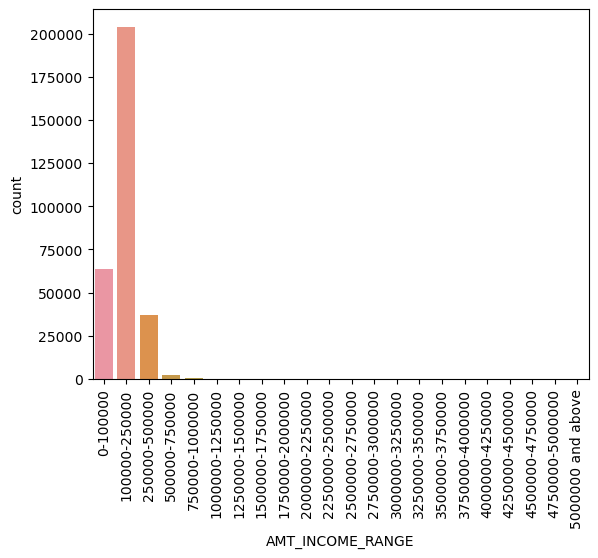

In [159]:
#we will visualize the above 2 columns which are added in the application df 
sns.countplot(data=application_data_df,x='AMT_INCOME_RANGE')
plt.xticks(rotation=90)
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> Max. income range is from 100000 to 250000 </span></br>

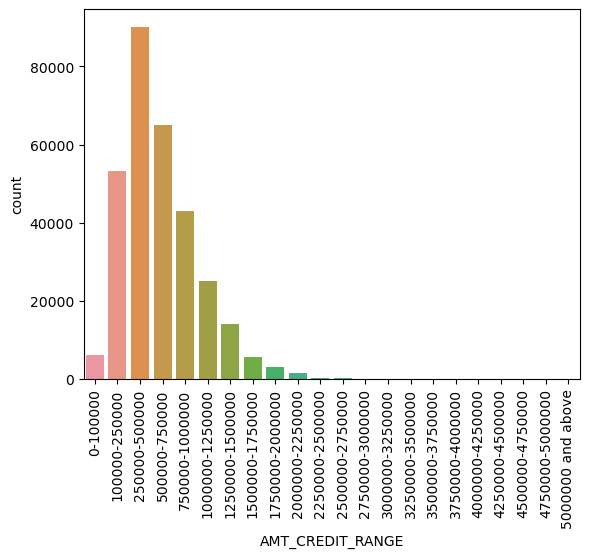

In [104]:
#we will visualize the above 2 columns which are added in the application df 
sns.countplot(data=application_data_df,x='AMT_CREDIT_RANGE')
plt.xticks(rotation=90)
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> Max. credit range is from 250000 to 500000 </span>

</br>

#### 3.5 Handling Outliers 

In [166]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

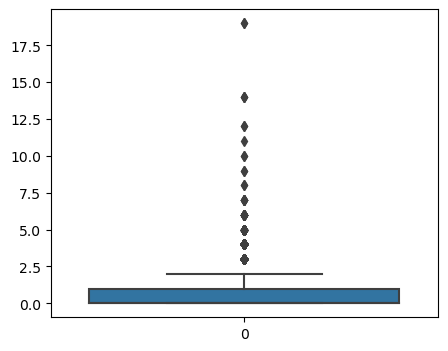

In [194]:
#we will use boxplot to check the outliers 
plt.figure(figsize=(5, 4))
sns.boxplot(application_data_df['CNT_CHILDREN'])
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> The count of children is from 0 to 19 that means it has outliers. 19 Kids are practically possible but their might be error while entering the data </span>

</br>

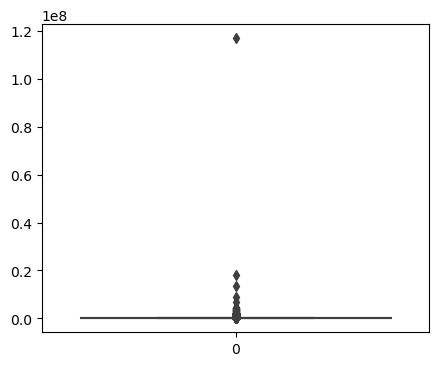

In [193]:
plt.figure(figsize=(5, 4))
sns.boxplot(application_data_df['AMT_INCOME_TOTAL'])
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> There is one amount which is far more than the amount income range hence it has outlier. 
 </span>

</br>

Following is the outlier information

In [171]:
#checking the outlier information 

application_data_df[application_data_df['AMT_INCOME_TOTAL'] == application_data_df['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840     114967      1         Cash loans           F            N   

      FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12840               Y            1       117000000.0    562491.0      26194.5   

       ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
12840  ...                       0.0                      0.0   

      AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
12840                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
12840                        0.0                         1.0   

        AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
12840  5000000 and above     500000-750000  

[1 rows x 44 columns]

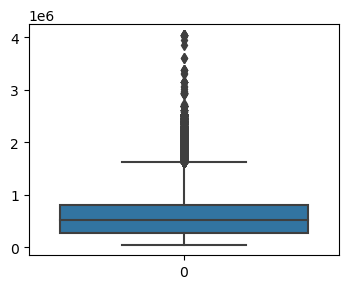

In [189]:
#amount credited has also outliers ranging from 1.5 to 4 
plt.figure(figsize=(4, 3))
sns.boxplot(application_data_df['AMT_CREDIT'])
plt.show()

In [172]:
# we will check the outliers above 3.5 
application_data_df[application_data_df['AMT_CREDIT']> 3500000]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643      117085      0         Cash loans           F            Y   
14852      117337      0         Cash loans           M            N   
17948      120926      0         Cash loans           M            Y   
53936      162494      0         Cash loans           M            Y   
95571      210956      0         Cash loans           M            N   
104577     221360      0         Cash loans           M            Y   
110459     228135      0         Cash loans           M            N   
119380     238431      0         Cash loans           F            Y   
119681     238782      0         Cash loans           M            Y   
120757     240007      0         Cash loans           M            N   
133766     255139      0         Cash loans           F            Y   
186230     315893      1         Cash loans           F            N   
287732     433294      0         Cash loans           F            Y   
288455     434170      0         Cash loans           F            Y   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643                N            2          749331.0   3956274.0   
14852                Y            1          760846.5   4050000.0   
17948                N            2          783000.0   4050000.0   
53936                N            0          900450.0   3600000.0   
95571                Y            0          430650.0   4031032.5   
104577               N            0          468000.0   3600000.0   
110459               N            2          864900.0   4050000.0   
119380               N            0          292050.0   3860019.0   
119681               Y            1          931365.0   4050000.0   
120757               N            0          587250.0   4050000.0   
133766               N            1         1307587.5   4050000.0   
186230               N            0          458550.0   4027680.0   
287732               N            1          405000.0   4050000.0   
288455               N            1          450000.0   4050000.0   

        AMT_ANNUITY  ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
14643      197230.5  ...                       0.0                      0.0   
14852      146002.5  ...                       0.0                      0.0   
17948      258025.5  ...                       0.0                      0.0   
53936       91008.0  ...                       0.0                      0.0   
95571      102033.0  ...                       1.0                      0.0   
104577      91138.5  ...                       0.0                      0.0   
110459     102384.0  ...                       3.0                      1.0   
119380      97578.0  ...                       1.0                      0.0   
119681     102514.5  ...                       0.0                      0.0   
120757     106969.5  ...                       0.0                      0.0   
133766     100197.0  ...                       1.0                      0.0   
186230     106380.0  ...                       0.0                      0.0   
287732     102514.5  ...                       3.0                      0.0   
288455     106839.0  ...                       1.0                      0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
14643                         0.0                       0.0   
14852                         0.0                       0.0   
17948                         0.0                       0.0   
53936                         0.0                       0.0   
95571                         0.0                       0.0   
104577                        0.0                       0.0   
110459                        0.0                       0.0   
119380                        0.0                       0.0   
119681                        0.0                       0.0   
120757                        0.0                       0.0   
133766     

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> From the above table we can say the data is right because the AMT_INCOME_TOTAL > AMT_CREDIT 
 </span>

</br>

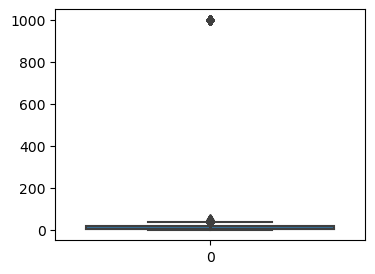

In [197]:
#years of employment 
plt.figure(figsize=(4, 3))
sns.boxplot(application_data_df['YEARS_EMPLOYED'])
plt.show() 

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> There is an outlier because around 1000 years of employment is not possible  </span>

</br>

## checking the target variable count 

In [198]:
application_data_df['TARGET'].value_counts()

#there is imbalance between target 0 and 1 

TARGET
0    282686
1     24825
Name: count, dtype: int64

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. Target 0 applicants are 11x times greater than target 1  </span> </br>
<span style="color: darkgreen;"> 2. We will create seperate dataframe of above targets to analyse the data  </span>


</br>

In [200]:
appli_data_target0 = application_data_df[application_data_df['TARGET']==0] #created the df for target 0 applicants 
appli_data_target0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   
5     100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   
5               Y            0           99000.0    490495.5      27517.5   

   ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   
5  ...                       0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
5                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  \
1                        0.0                         0.0     250000-500000   
2                        0.0                         0.0          0-100000   
3                        0.0                         0.0     100000-250000   
4                        0.0                         0.0     100000-250000   
5                        1.0                         1.0          0-100000   

   AMT_CREDIT_RANGE  
1   1250000-1500000  
2     100000-250000  
3     250000-500000  
4     500000-750000  
5     250000-500000  

[5 rows x 44 columns]

In [201]:
appli_data_target1 = application_data_df[application_data_df['TARGET']==1]
appli_data_target1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
26     100031      1         Cash loans           F            N   
40     100047      1         Cash loans           M            N   
42     100049      1         Cash loans           F            N   
81     100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y            0          202500.0    406597.5      24700.5   
26               Y            0          112500.0    979992.0      27076.5   
40               Y            0          202500.0   1193580.0      35028.0   
42               N            0          135000.0    288873.0      16258.5   
81               Y            0           81000.0    252000.0      14593.5   

    ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0   ...                       2.0                      2.0   
26  ...                      10.0                      0.0   
40  ...                       0.0                      0.0   
42  ...                       1.0                      0.0   
81  ...                       1.0                      1.0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       0.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       2.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  \
0                         0.0                         1.0     100000-250000   
26                        2.0                         2.0     100000-250000   
40                        0.0                         4.0     100000-250000   
42                        0.0                         2.0     100000-250000   
81                        0.0                         0.0          0-100000   

    AMT_CREDIT_RANGE  
0      250000-500000  
26    750000-1000000  
40   1000000-1250000  
42     250000-500000  
81     250000-500000  

[5 rows x 44 columns]

In [202]:
appli_data_target0.shape

(282686, 44)

In [203]:
appli_data_target1.shape

(24825, 44)

In [143]:
#we will take ratio of this 2 dataframe to check the data balancing 
ratio = appli_data_target0.shape[0]/appli_data_target1.shape[0]
ratio

11.387150050352467


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> From above result we can conclude that for every 1 target variable there is 11 '0s' which is imbalance dataset 
  </span> </br>


</br>

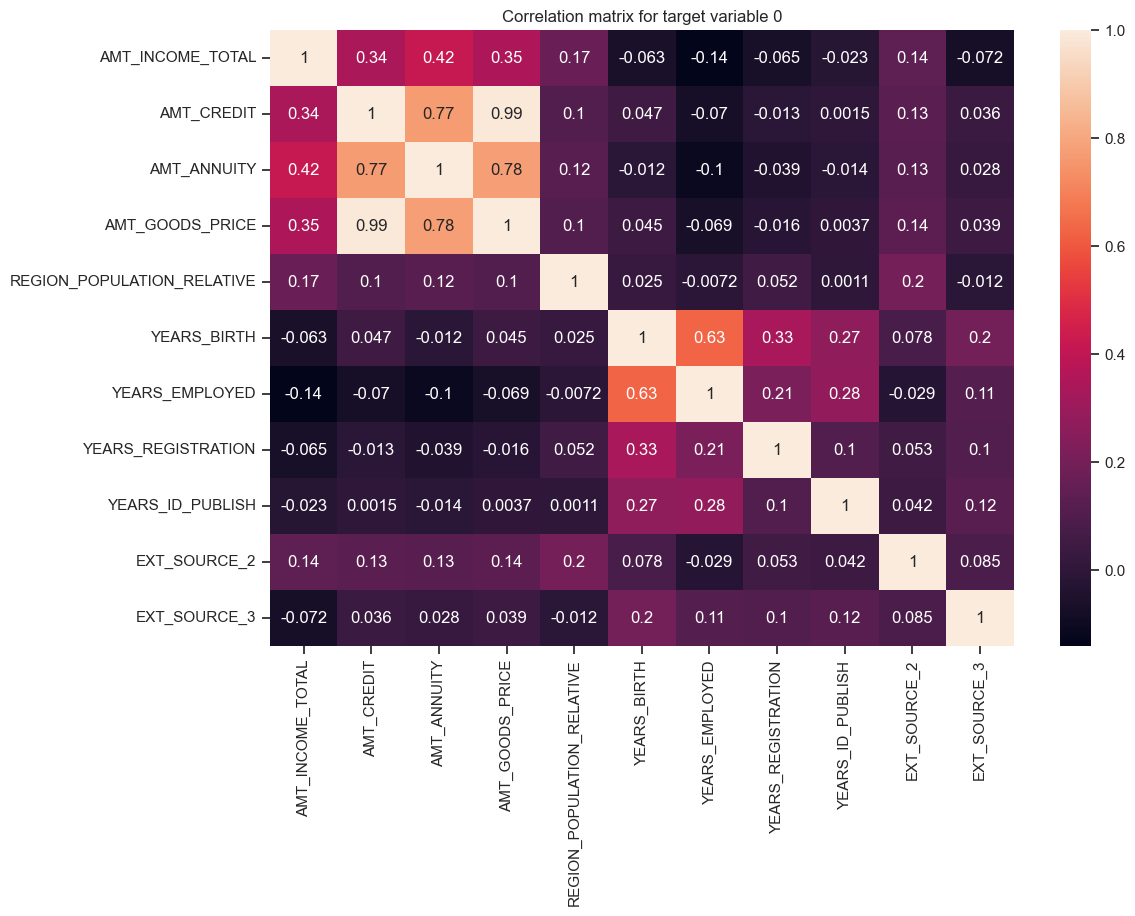

In [381]:
#we need considet only numeric data type for coorelation matrix hence creating a df whihc is having only numeric data 
plt.figure(figsize=(12,8)) 

appli_data_target0_numeric = appli_data_target0.select_dtypes(include=['float64'])
sns.heatmap(appli_data_target0_numeric.corr(),annot=True)
plt.title('Correlation matrix for target variable 0')
plt.show()

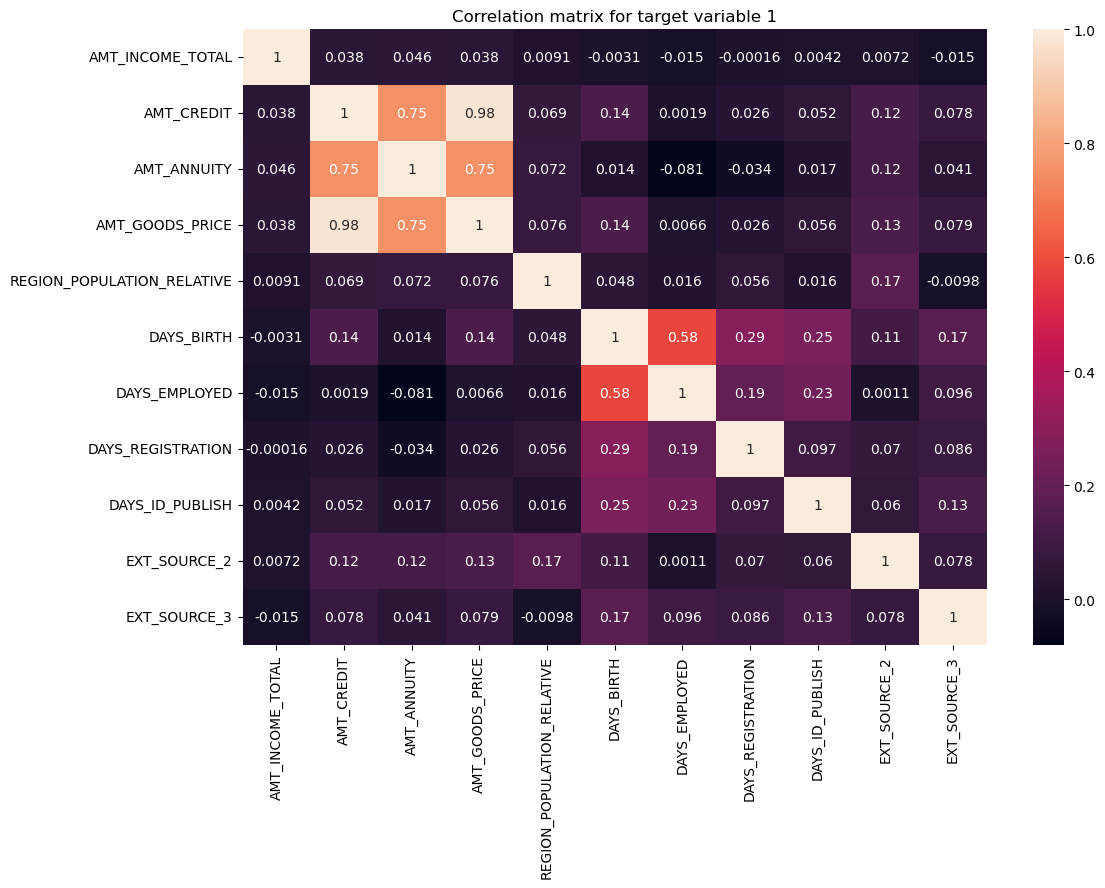

In [152]:
plt.figure(figsize=(12,8)) 

appli_data_target1_numeric = appli_data_target1.select_dtypes(include=['float64'])
sns.heatmap(appli_data_target1_numeric.corr(),annot=True)
plt.title('Correlation matrix for target variable 1')
plt.show()

# 4. Univariate Analysis 

#### 4.1 Categorical Variable 

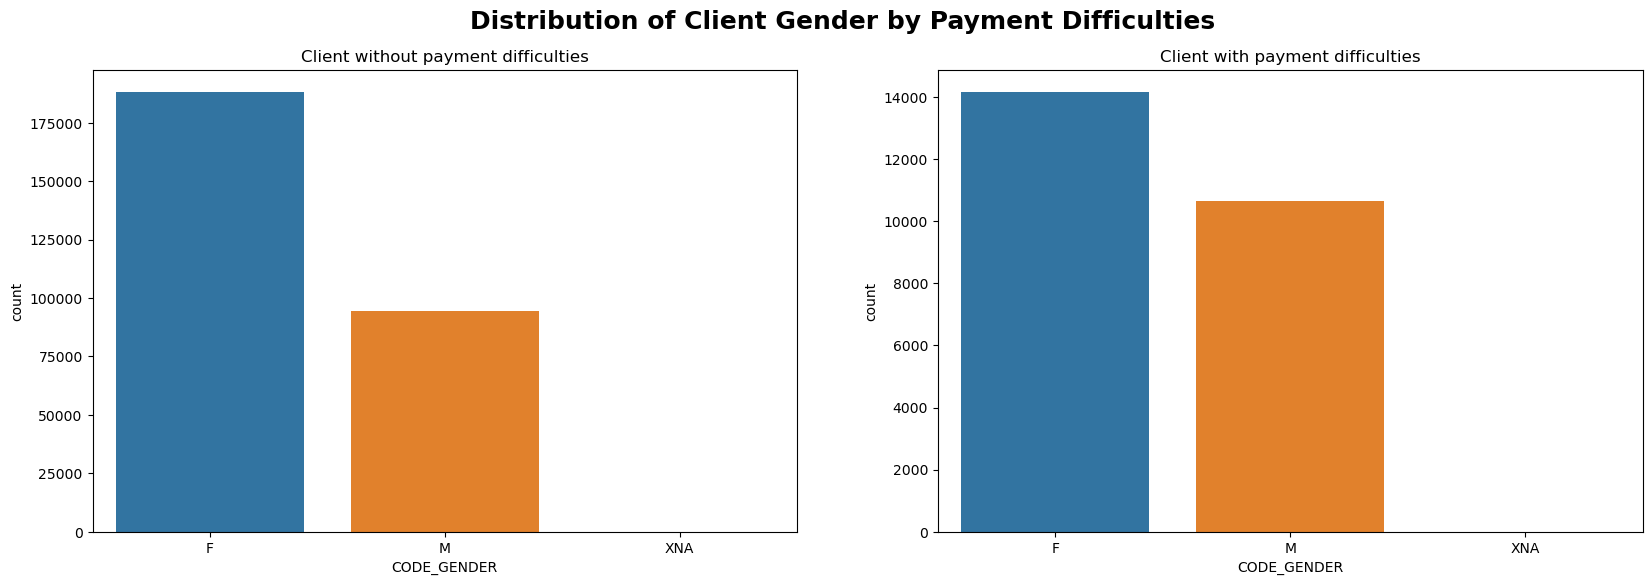

In [230]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',data=appli_data_target0)
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client Gender by Payment Difficulties", fontsize=18, fontweight='bold')

plt.show()


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. Female count is high in both the cases </br> 
2. Male count is higher in payment difficulty than without payment difficulty 
  </span> </br>


</br>

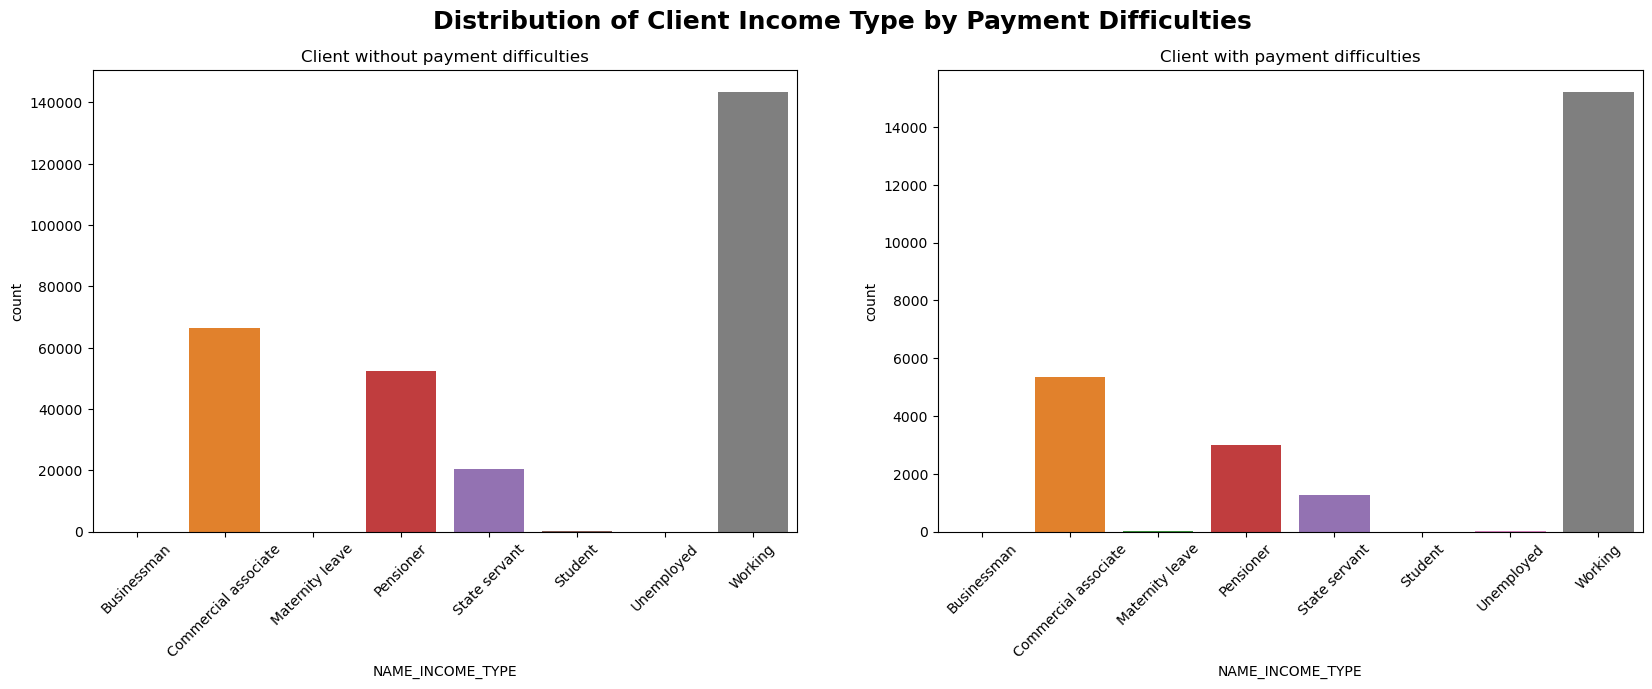

In [263]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE',data=appli_data_target0)
plt.xticks(rotation=45)
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE',data=appli_data_target1)
plt.title('Client with payment difficulties')
plt.xticks(rotation=45)
plt.suptitle("Distribution of Client Income Type by Payment Difficulties", fontsize=18, fontweight='bold')

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. Count of working income type is almost same in both scenerios </br> 
2. State servant & Pensioner has low percentage of payment difficulties  

</span> </br>

</br>

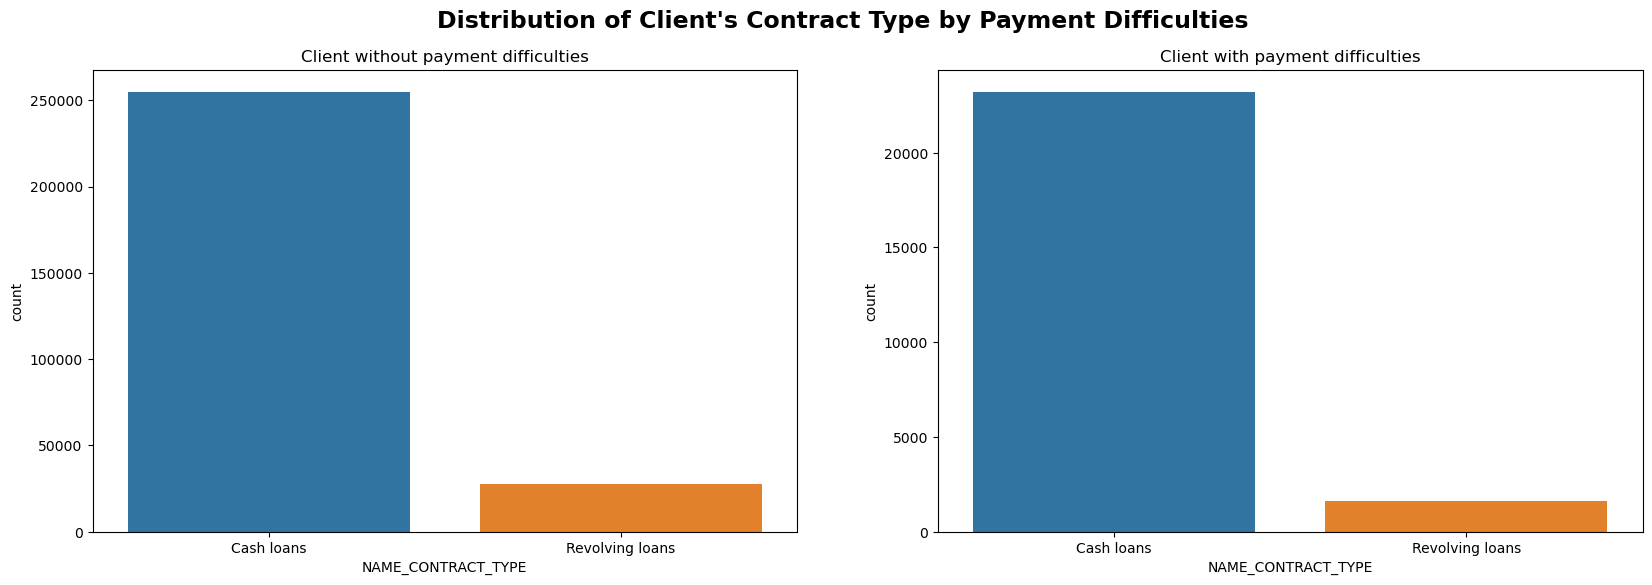

In [250]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appli_data_target0)
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client's Contract Type by Payment Difficulties", fontsize=17, fontweight='bold')

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1.Clients having Cash loan contract type has higher count in both the cases </br> 
2.Clients without payment difficulties has highest count i.e around 250000 and client with payment difficulties has around 25000 count for cash loan contract type  

</span> </br>

</br>

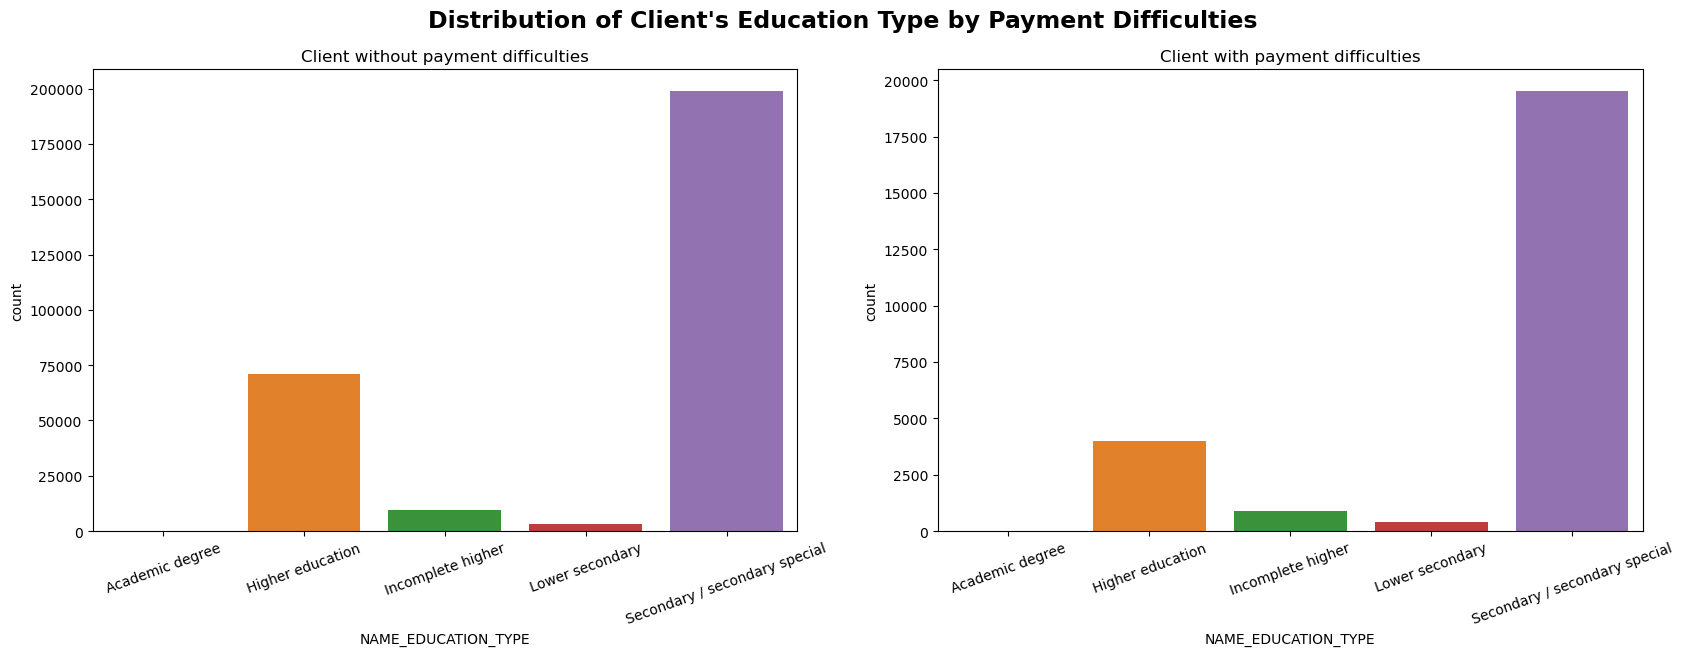

In [258]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',data=appli_data_target0)
plt.title('Client without payment difficulties')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client's Education Type by Payment Difficulties", fontsize=17, fontweight='bold')
plt.xticks(rotation=20)
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1.Secondary / secondary special has highest count of applications in both the cases </br> 
2.Higher education type having less payment difficulties i.e they may be having a better job because of higher education 

</span> </br>

</br>

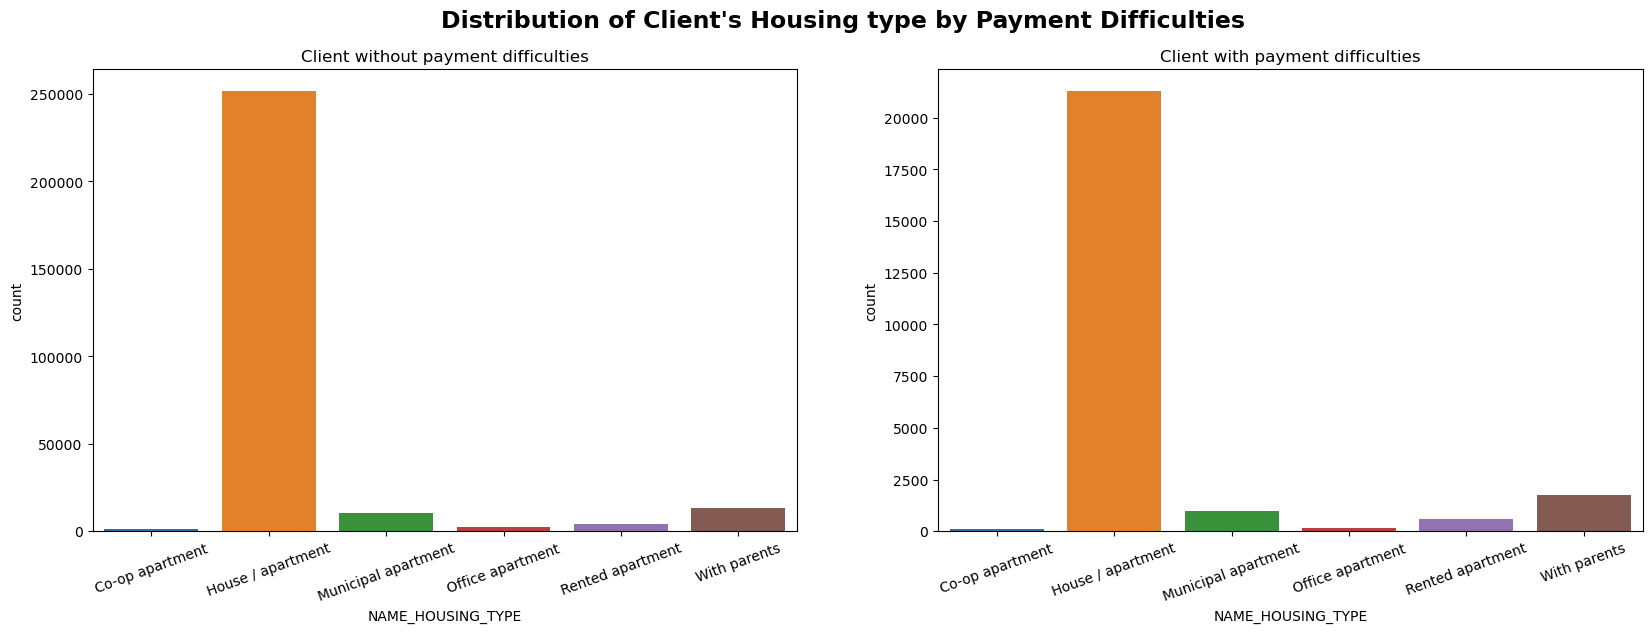

In [265]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='NAME_HOUSING_TYPE',data=appli_data_target0)
plt.title('Client without payment difficulties')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client's Housing type by Payment Difficulties", fontsize=17, fontweight='bold')
plt.xticks(rotation=20)
plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. Clients having own house / apartment are applying very high for credit </br> 
2. Count of payment difficulty is higher in both the cases </br>
3. We can say, these clients may be having housing loan 

</span> </br>

</br>

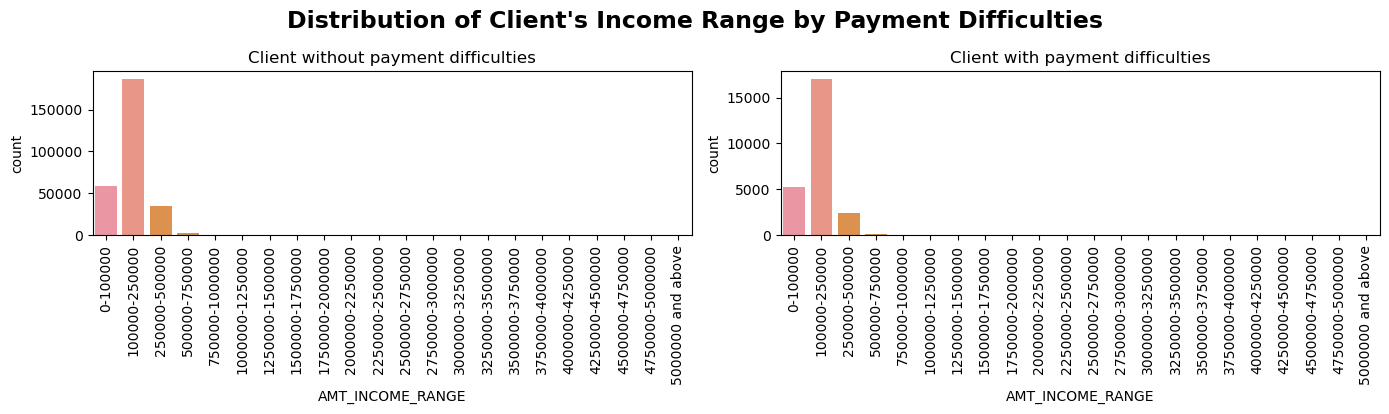

In [306]:
plt.figure(figsize=(14,6)) 
#AMT_CREDIT_RANGE

plt.subplot(2,2,1)
sns.countplot(x='AMT_INCOME_RANGE',data=appli_data_target0)
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(x='AMT_INCOME_RANGE',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client's Income Range by Payment Difficulties", fontsize=17, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. Clients having income range from 10000-250000 are very high number of applicants </br> 
2. No such difference in both payment difficulties case  </br>

</span> </br>

</br>

Numerical-Numerical Data Type 

In [259]:
# Checking any outliers in the 'DAYS_BIRTH' col.
print(appli_data_target0['YEARS_BIRTH'].describe())
print(appli_data_target1['YEARS_BIRTH'].describe())

count    282686.000000
mean         44.214185
std          11.956714
min          20.520000
25%          34.350000
50%          43.500000
75%          54.230000
max          69.120000
Name: YEARS_BIRTH, dtype: float64
count    24825.000000
mean        40.780352
std         11.487277
min         21.040000
25%         31.220000
50%         39.130000
75%         49.420000
max         68.950000
Name: YEARS_BIRTH, dtype: float64


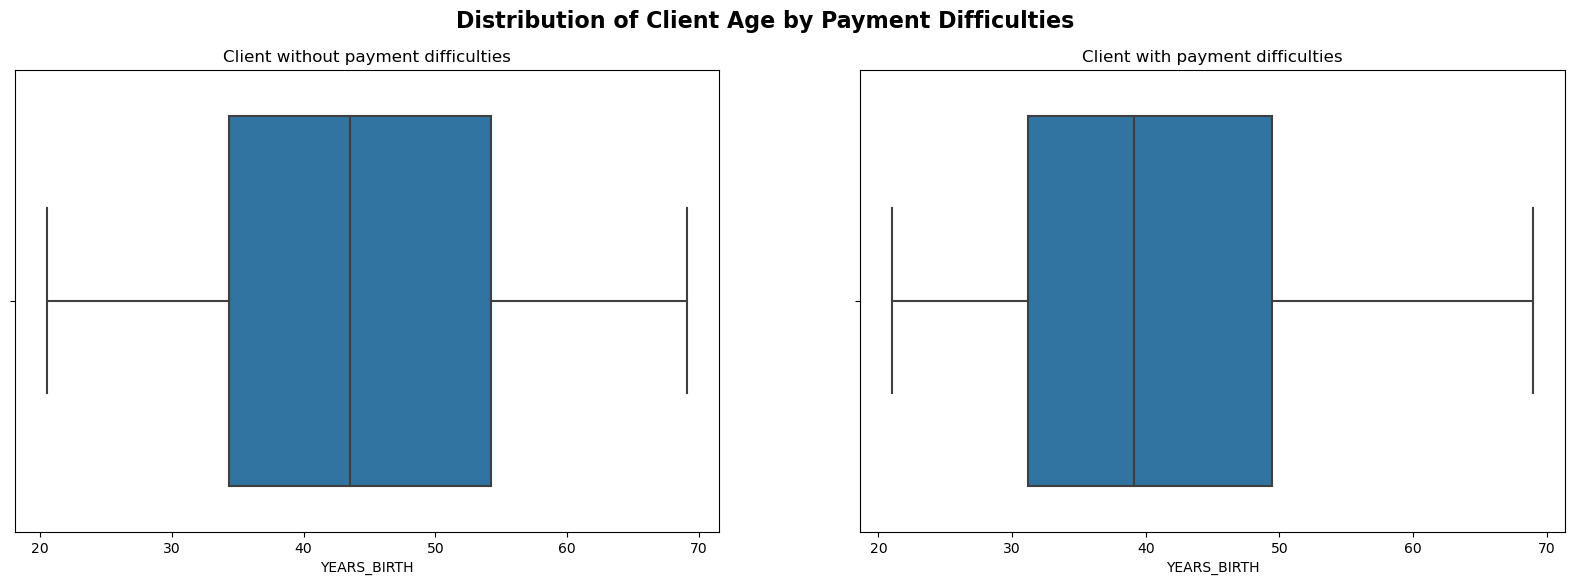

In [215]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x='YEARS_BIRTH',data=appli_data_target0)
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.boxplot(x='YEARS_BIRTH',data=appli_data_target1)
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client Age by Payment Difficulties", fontsize=16, fontweight='bold')

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;"> 1. There is no such big difference for payment diffculty considering the client's age  </br>
2. Client age from 20 to 69 are taking credit </br>
3. Client age around 35 to 55 having difficulties for payment </br></span> 

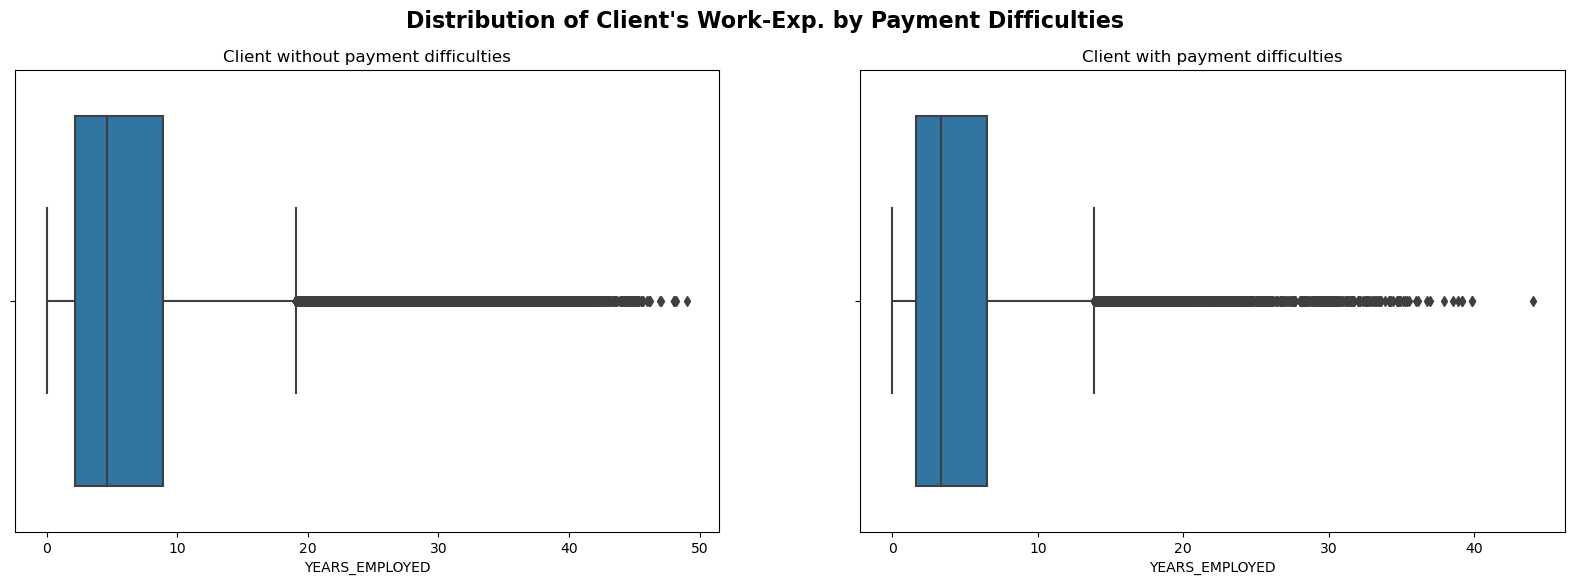

In [221]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x='YEARS_EMPLOYED',data=appli_data_target0[appli_data_target0['YEARS_EMPLOYED'] < 1000])
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.boxplot(x='YEARS_EMPLOYED',data=appli_data_target1[appli_data_target1['YEARS_EMPLOYED'] < 1000])
plt.title('Client with payment difficulties')

plt.suptitle("Distribution of Client's Work-Exp. by Payment Difficulties", fontsize=16, fontweight='bold')

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. There is no such big difference for payment diffculty considering the client's age  </br>
2. Client's having less than 10 years of work exp. have payement difficulties  </br>



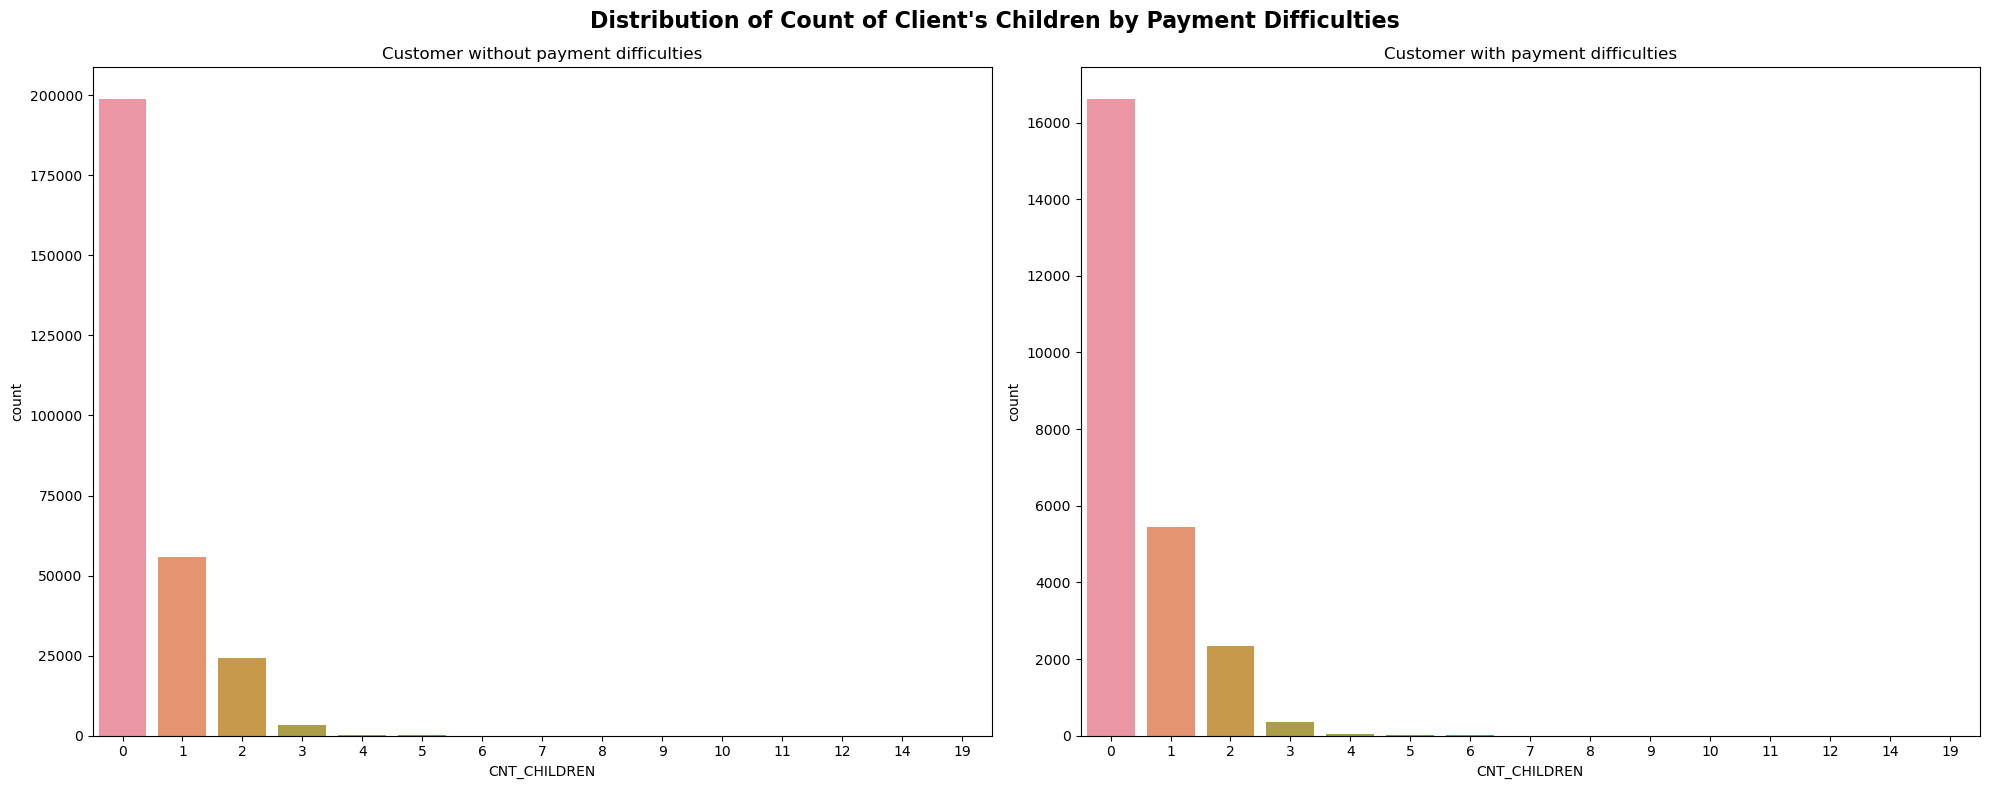

In [327]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='CNT_CHILDREN',data=appli_data_target0)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='CNT_CHILDREN',data=appli_data_target1)
plt.title('Customer with payment difficulties')

plt.suptitle("Distribution of Count of Client's Children by Payment Difficulties", fontsize=16, fontweight='bold')
plt.tight_layout()


plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. There is no such big difference for payment diffculty considering the count of children of the client  </br>
2. Client's having no children applying for the credit  </br>

In [ ]:
#Customer with and without payment difficulties lies in same range 0.3 to 0.7 and having same mean value as 0.5

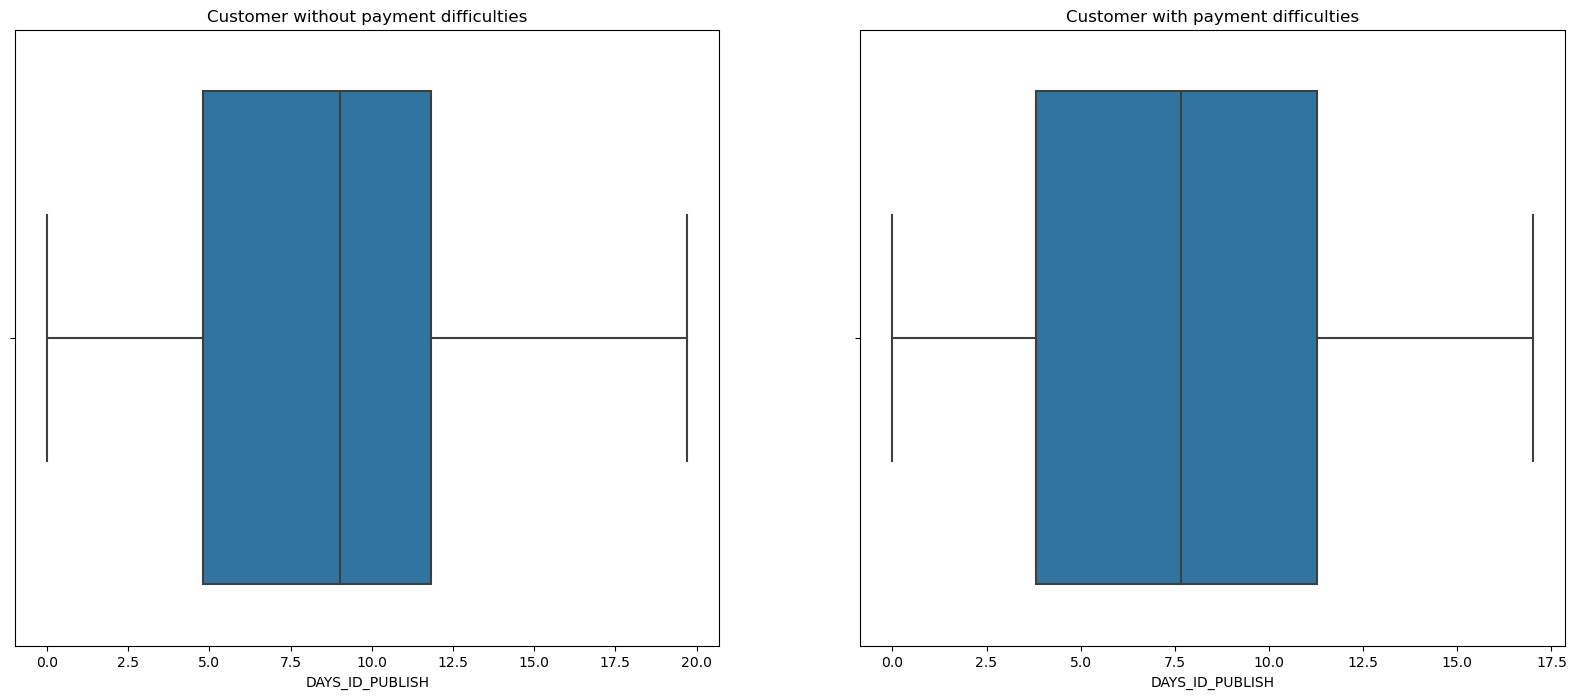

In [186]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(x='DAYS_ID_PUBLISH',data=appli_data_target0)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.boxplot(x='DAYS_ID_PUBLISH',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.show()

In [ ]:
# Customer without payment difficulties lies between 5 to 11 
# Customer with payment difficulties lies between 4 to 11 

Categorical Data Type 

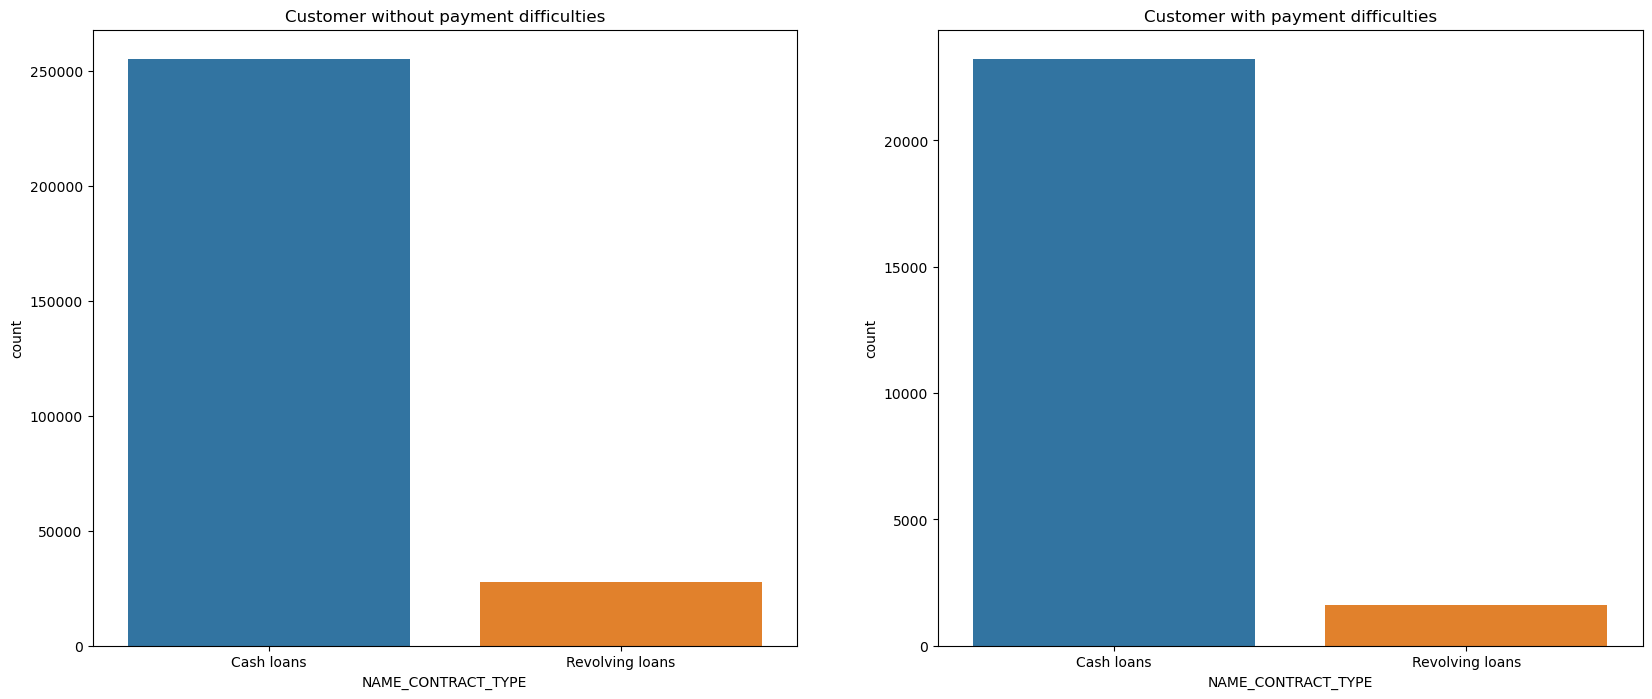

In [187]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appli_data_target0)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.show()

In [ ]:
#customer with and without payment difficutlies are taking cash loans 

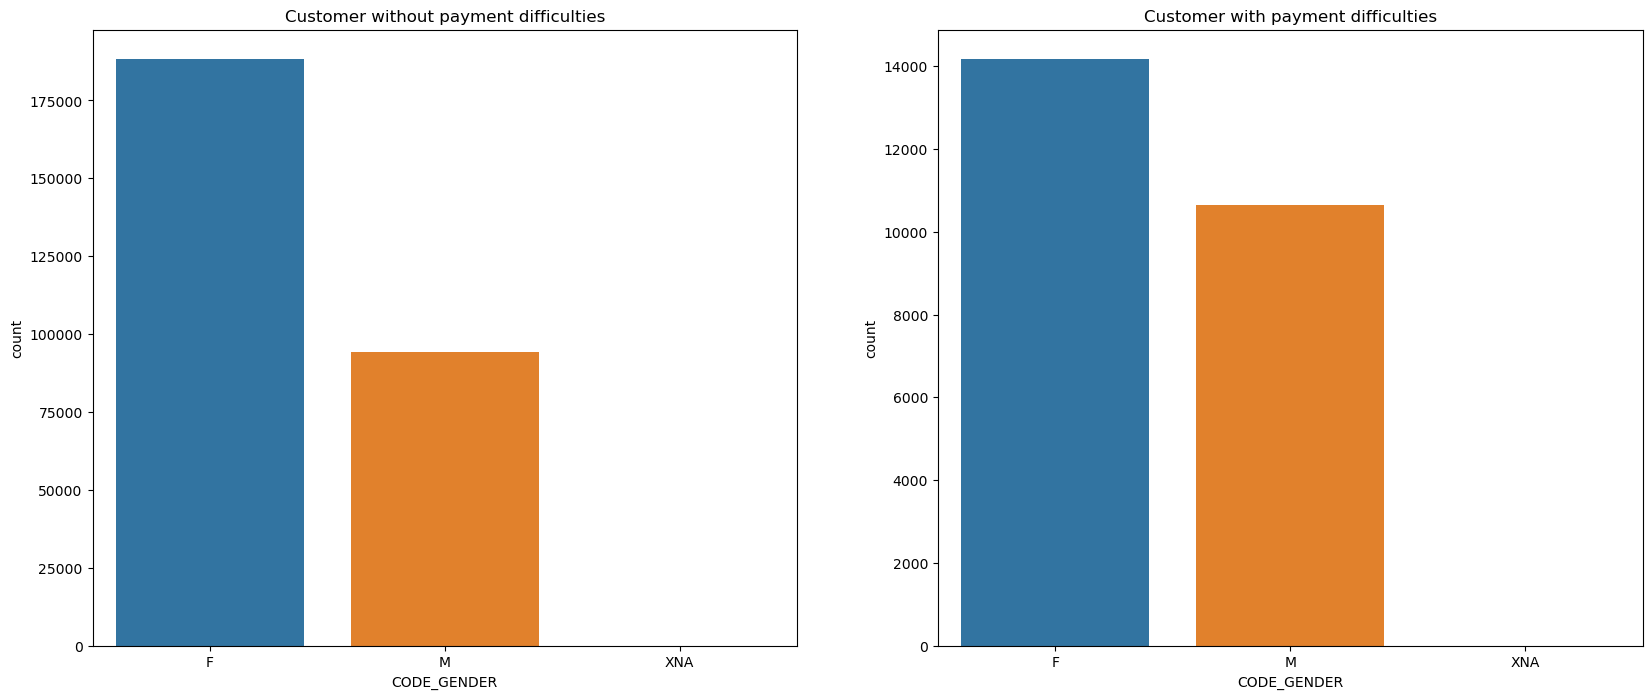

In [188]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',data=appli_data_target0)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.show()

In [ ]:
#Female count is high in both payment difficulties 

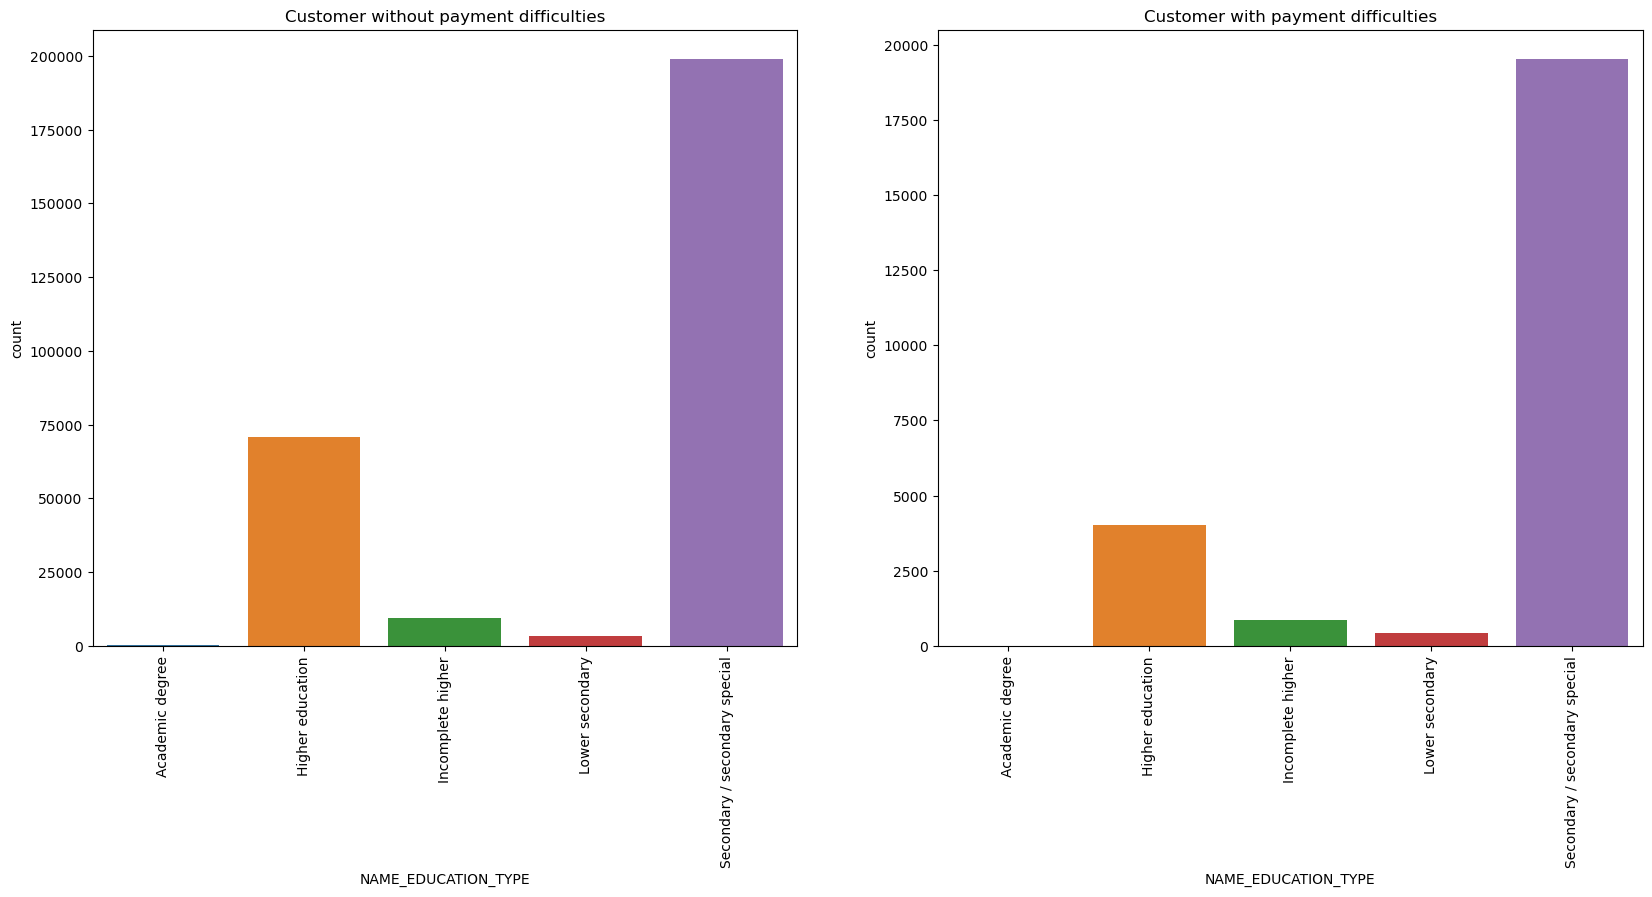

In [190]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',data=appli_data_target0)
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# customer having payment difficulties in secondary/ secondary special in both the cases

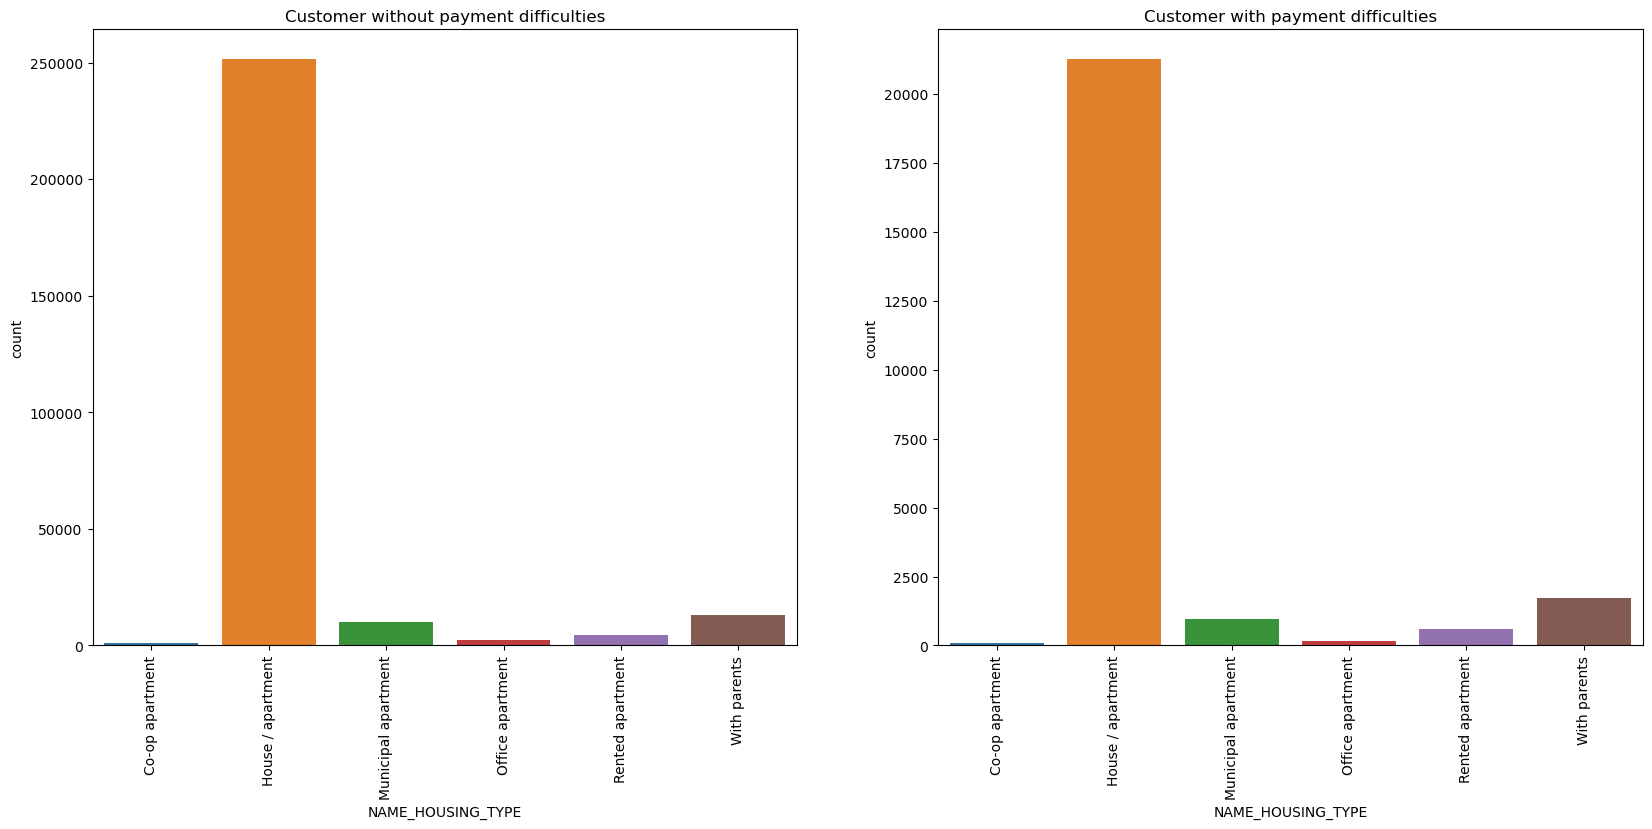

In [191]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='NAME_HOUSING_TYPE',data=appli_data_target0)
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [192]:
#  the payment difficulties in home/ apartment in both the cases. And we can also say that customers take loan for house/ apartment in compare to others.¶

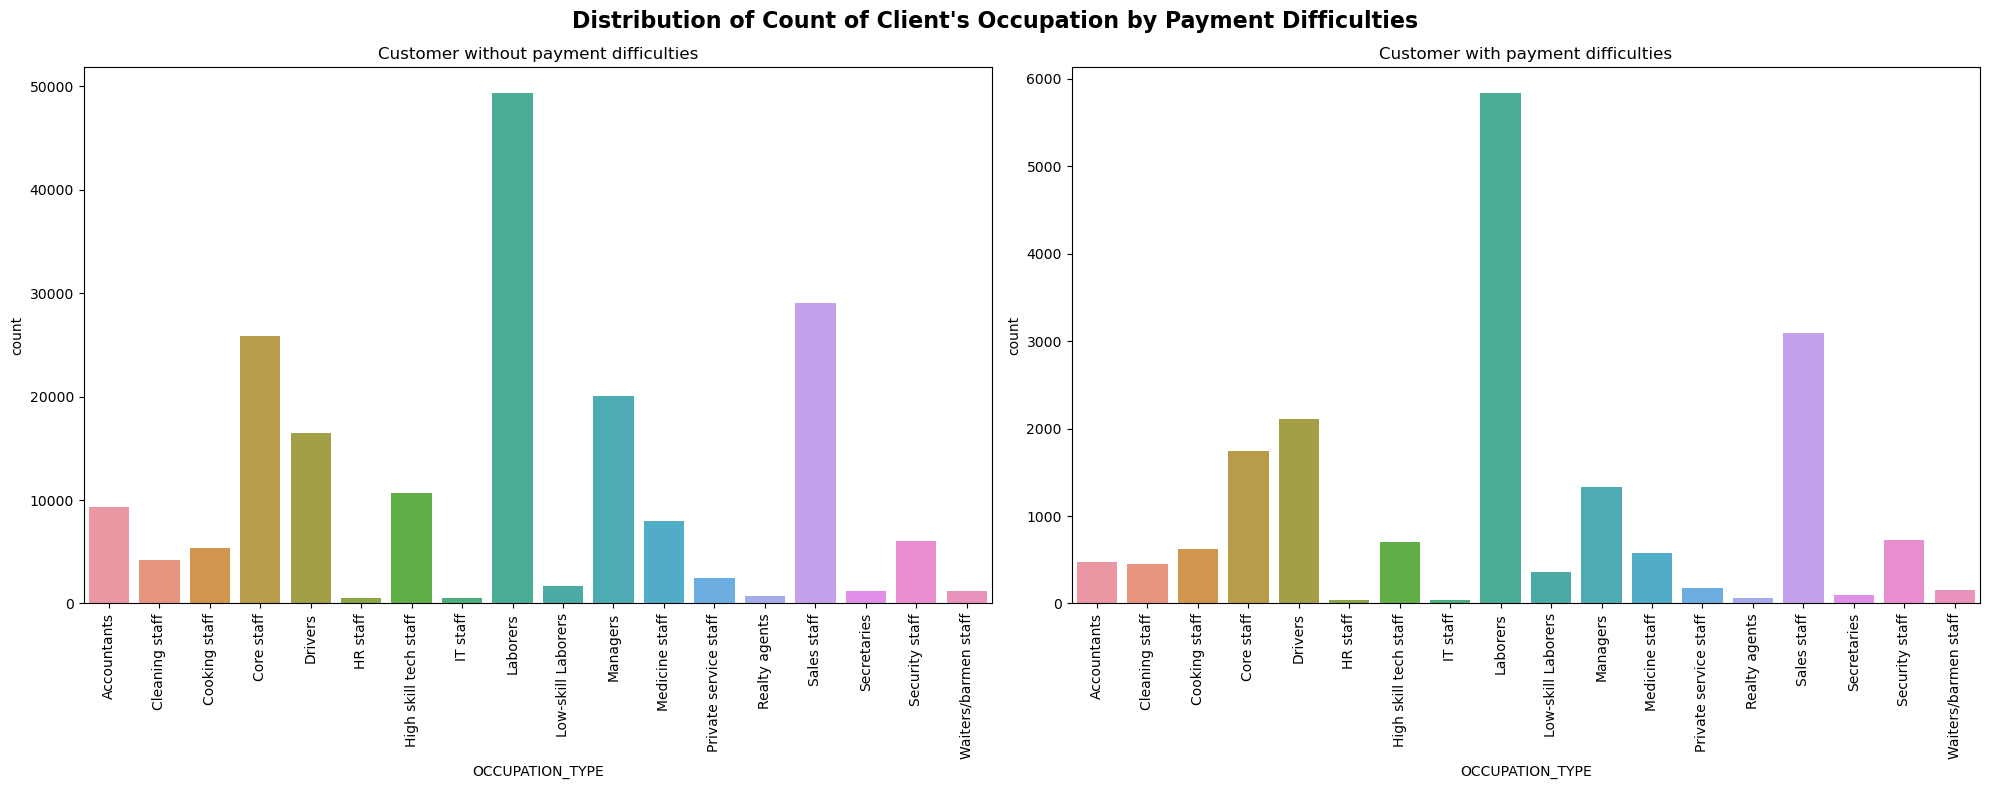

In [328]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE',data=appli_data_target0)
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE',data=appli_data_target1)
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.suptitle("Distribution of Count of Client's Occupation by Payment Difficulties", fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Laborers are very highly in applying for credit in both the cases </br>
2. Accountants, Core Staff, High-tech jobs, Medical Staff are having less payment difficulties  </br>

In [ ]:
# laborers are having more difficulties in repaying the loan and also the core staff and the sales staff. But in the case of laborers those wo have 
# without payment is way more then with having the payment.¶

# Bivariate Analysis 

Numerical-Numerical bivariate analysis

In [330]:
appli_data_target0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 1 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  282686 non-null  object  
 1   TARGET                      282686 non-null  category
 2   NAME_CONTRACT_TYPE          282686 non-null  category
 3   CODE_GENDER                 282686 non-null  category
 4   FLAG_OWN_CAR                282686 non-null  category
 5   FLAG_OWN_REALTY             282686 non-null  category
 6   CNT_CHILDREN                282686 non-null  category
 7   AMT_INCOME_TOTAL            282686 non-null  float64 
 8   AMT_CREDIT                  282686 non-null  float64 
 9   AMT_ANNUITY                 282674 non-null  float64 
 10  AMT_GOODS_PRICE             282429 non-null  float64 
 11  NAME_TYPE_SUITE             281464 non-null  category
 12  NAME_INCOME_TYPE            282686 non-null  category
 13  NAME

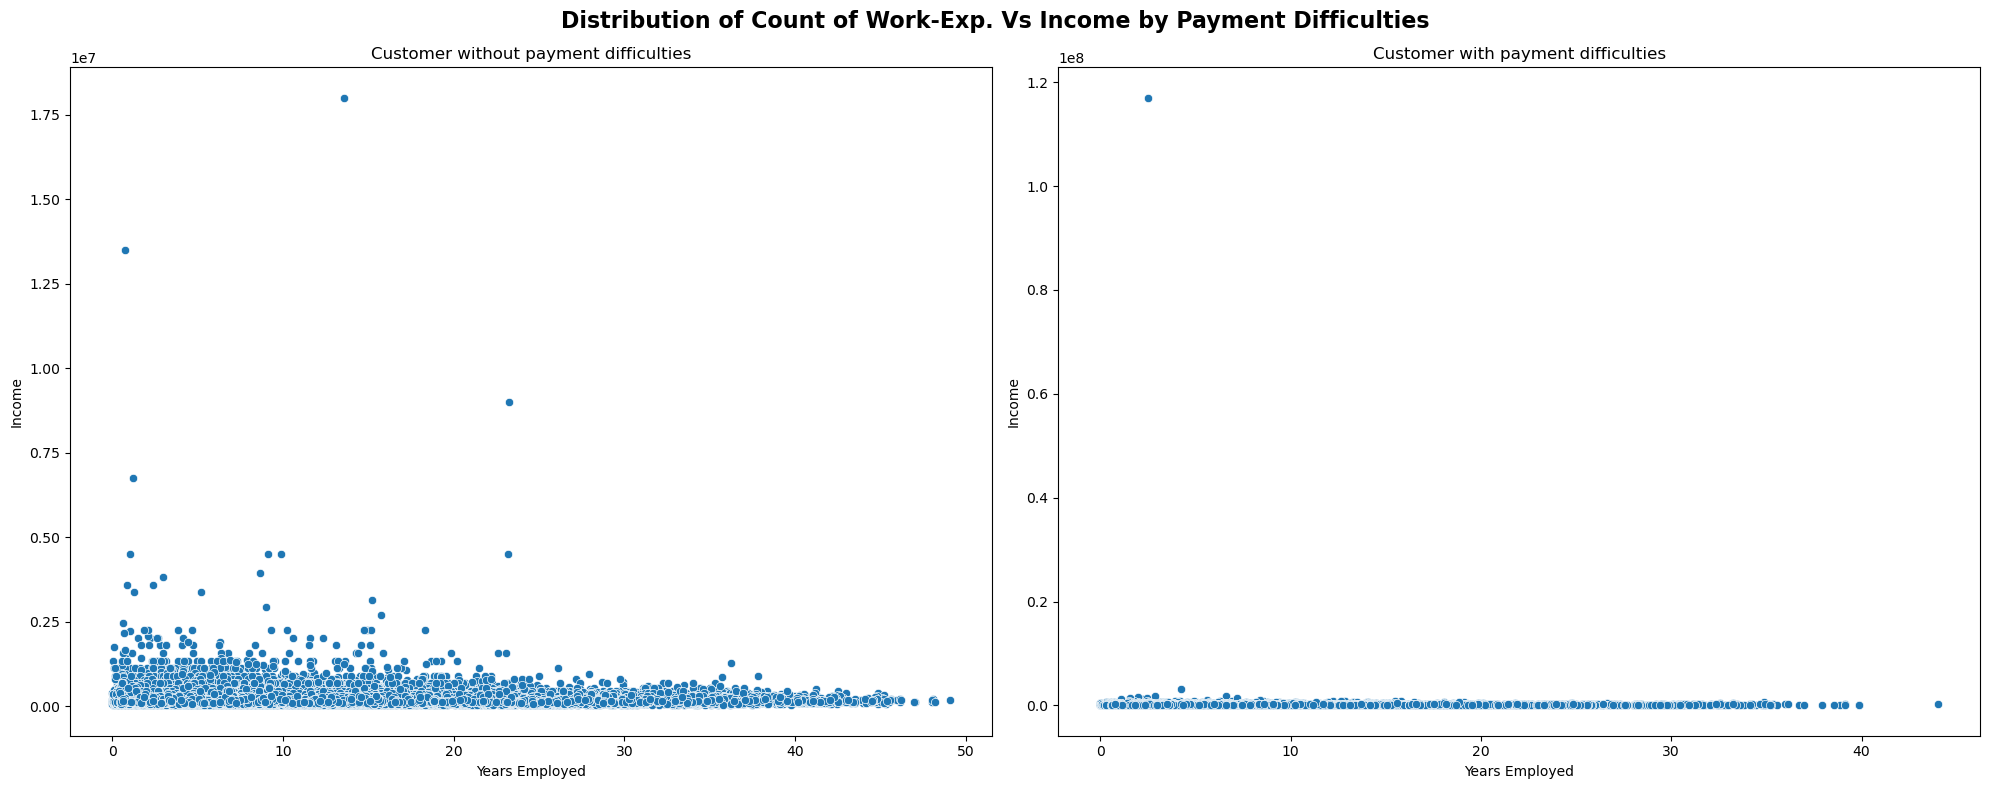

In [343]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=appli_data_target0[appli_data_target0['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties')
plt.xlabel('Years Employed')
plt.ylabel('Income')

plt.subplot(1,2,2)
sns.scatterplot(data=appli_data_target1[appli_data_target1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties')
plt.xlabel('Years Employed')
plt.ylabel('Income')

plt.suptitle("Distribution of Count of Work-Exp. Vs Income by Payment Difficulties", fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Client having very low income having payment difficulties </br>
2. There no payment difficulties having income more than 100000  </br>

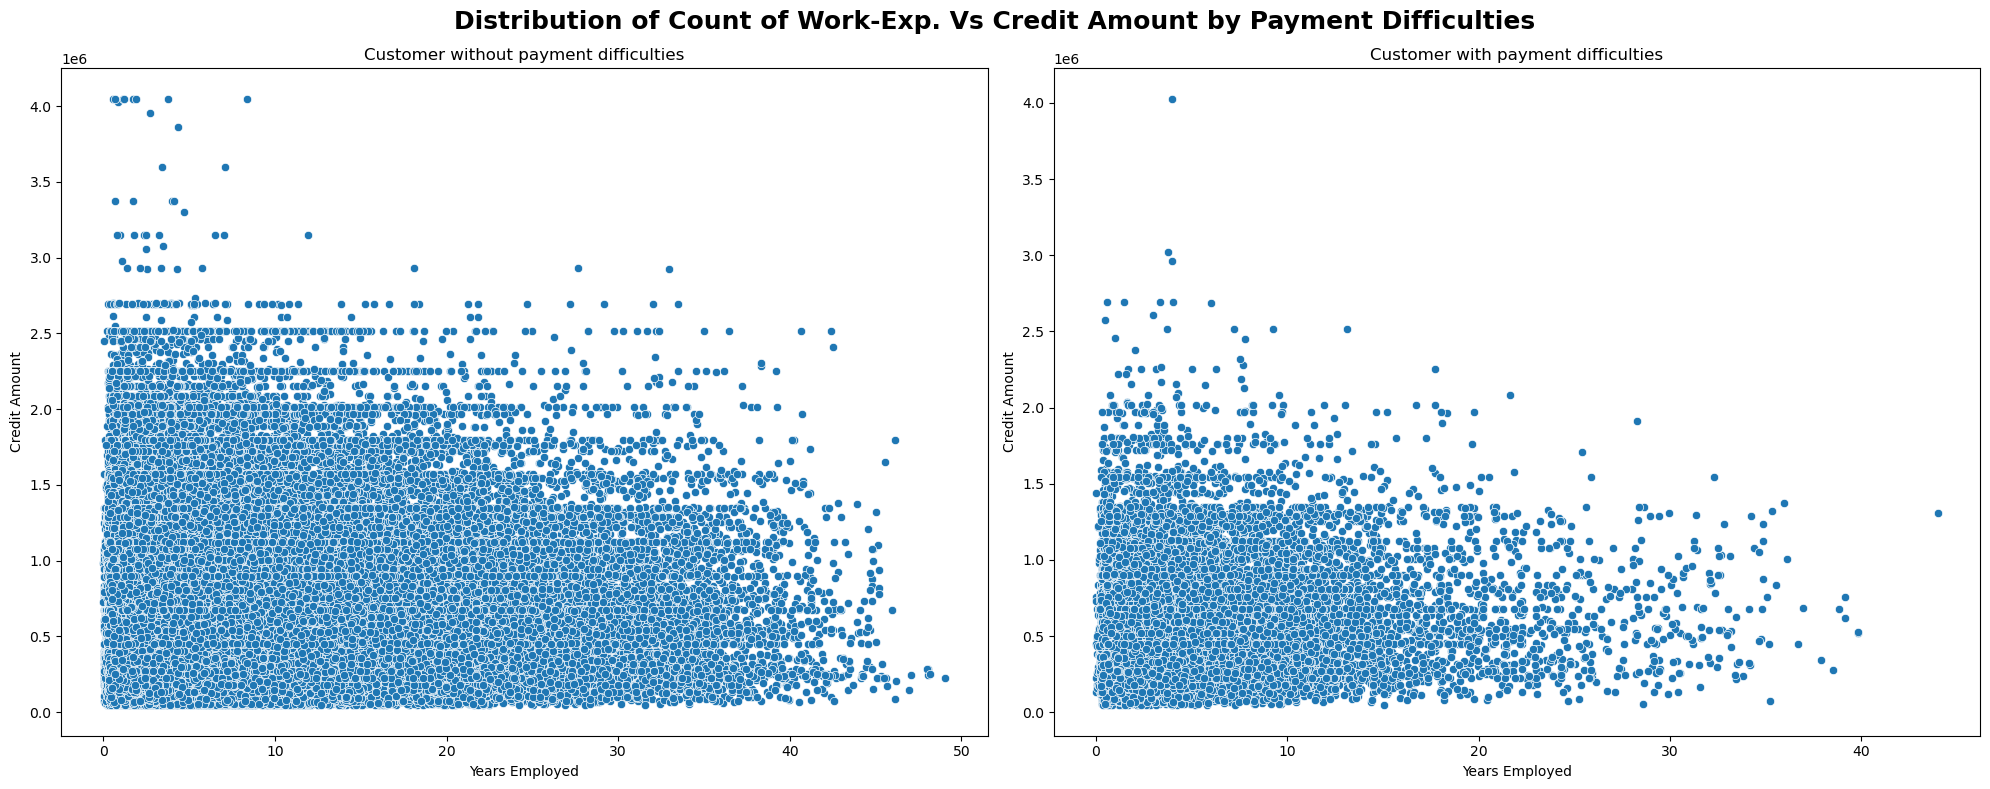

In [352]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=appli_data_target0[appli_data_target0['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_CREDIT')
plt.title('Customer without payment difficulties')
plt.xlabel('Years Employed')
plt.ylabel('Credit Amount')

plt.subplot(1,2,2)
sns.scatterplot(data=appli_data_target1[appli_data_target1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_CREDIT')
plt.title('Customer with payment difficulties')
plt.xlabel('Years Employed')
plt.ylabel('Credit Amount')

plt.suptitle("Distribution of Count of Work-Exp. Vs Credit Amount by Payment Difficulties", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Client has work experience upto 15-20 having more payment difficulties but the credit amount is low   </br>
2. Customer who has upto 50 years of work experience has highest credit amount and they dont have any payment difficulties </br>
3. As age increases the credit amount decreases </br>

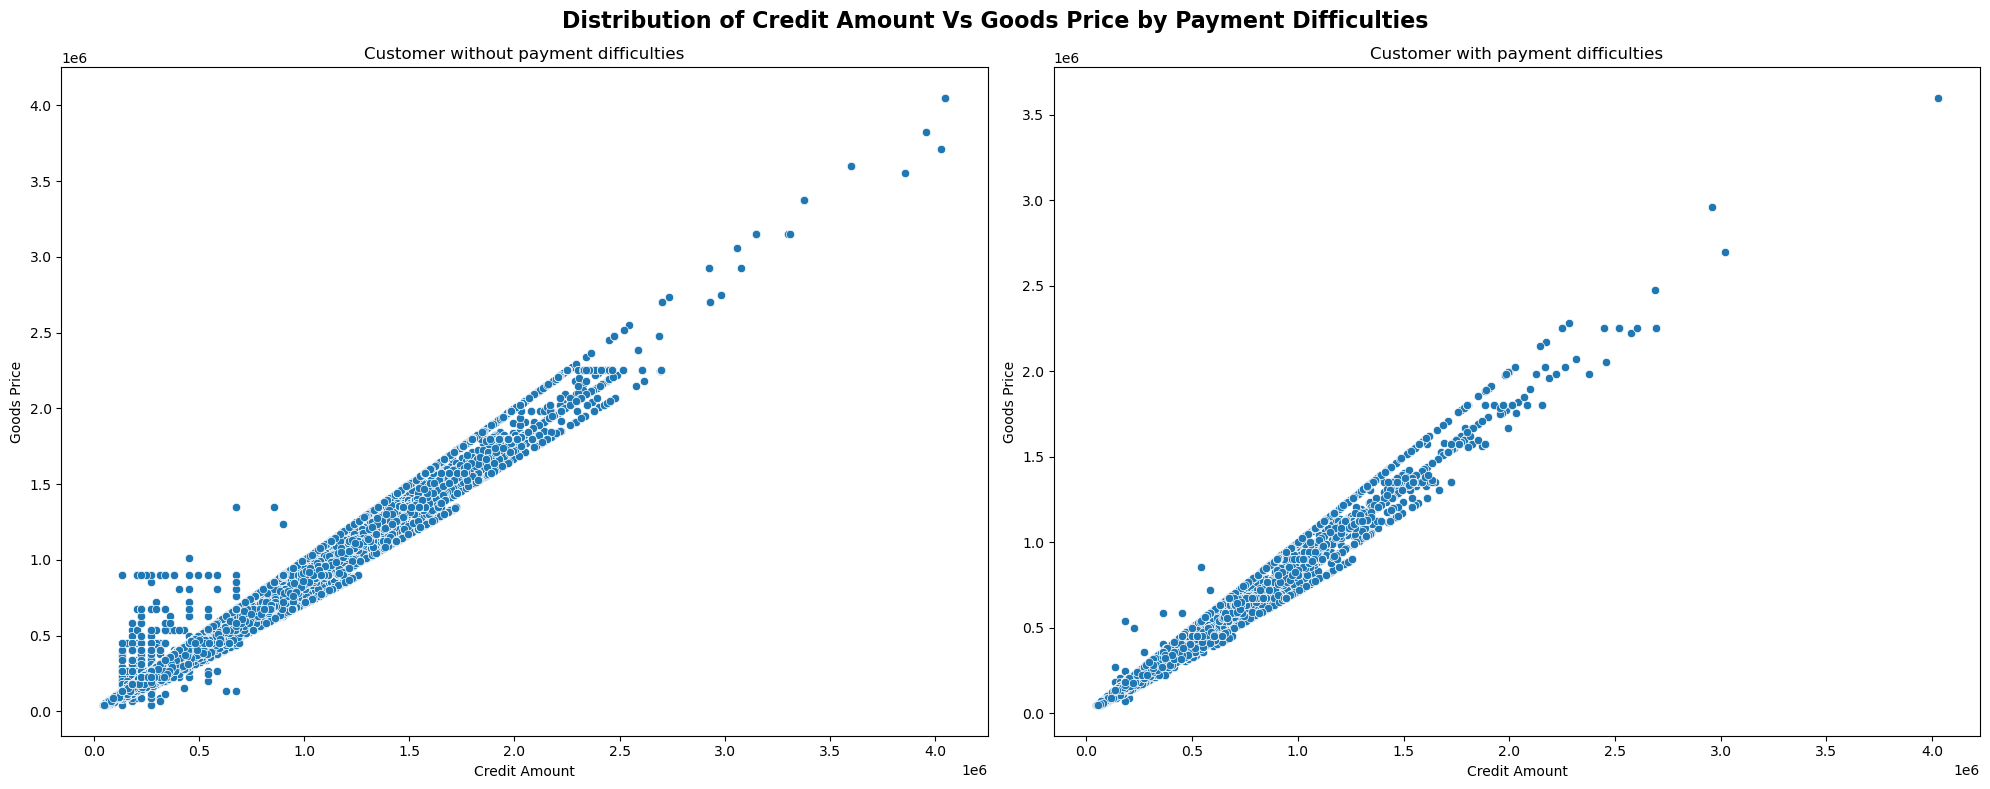

In [346]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=appli_data_target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')
plt.xlabel('Credit Amount')
plt.ylabel('Goods Price')

plt.subplot(1,2,2)
sns.scatterplot(data=appli_data_target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.xlabel('Credit Amount')
plt.ylabel('Goods Price')

plt.suptitle("Distribution of Credit Amount Vs Goods Price by Payment Difficulties", fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. We can see that credit amount is increases as goods amount is increases 
 </br>
2. There is no such major difference in both cases but client who took the credit maximum  upto 2.5 has payment difficulties`m  </br>

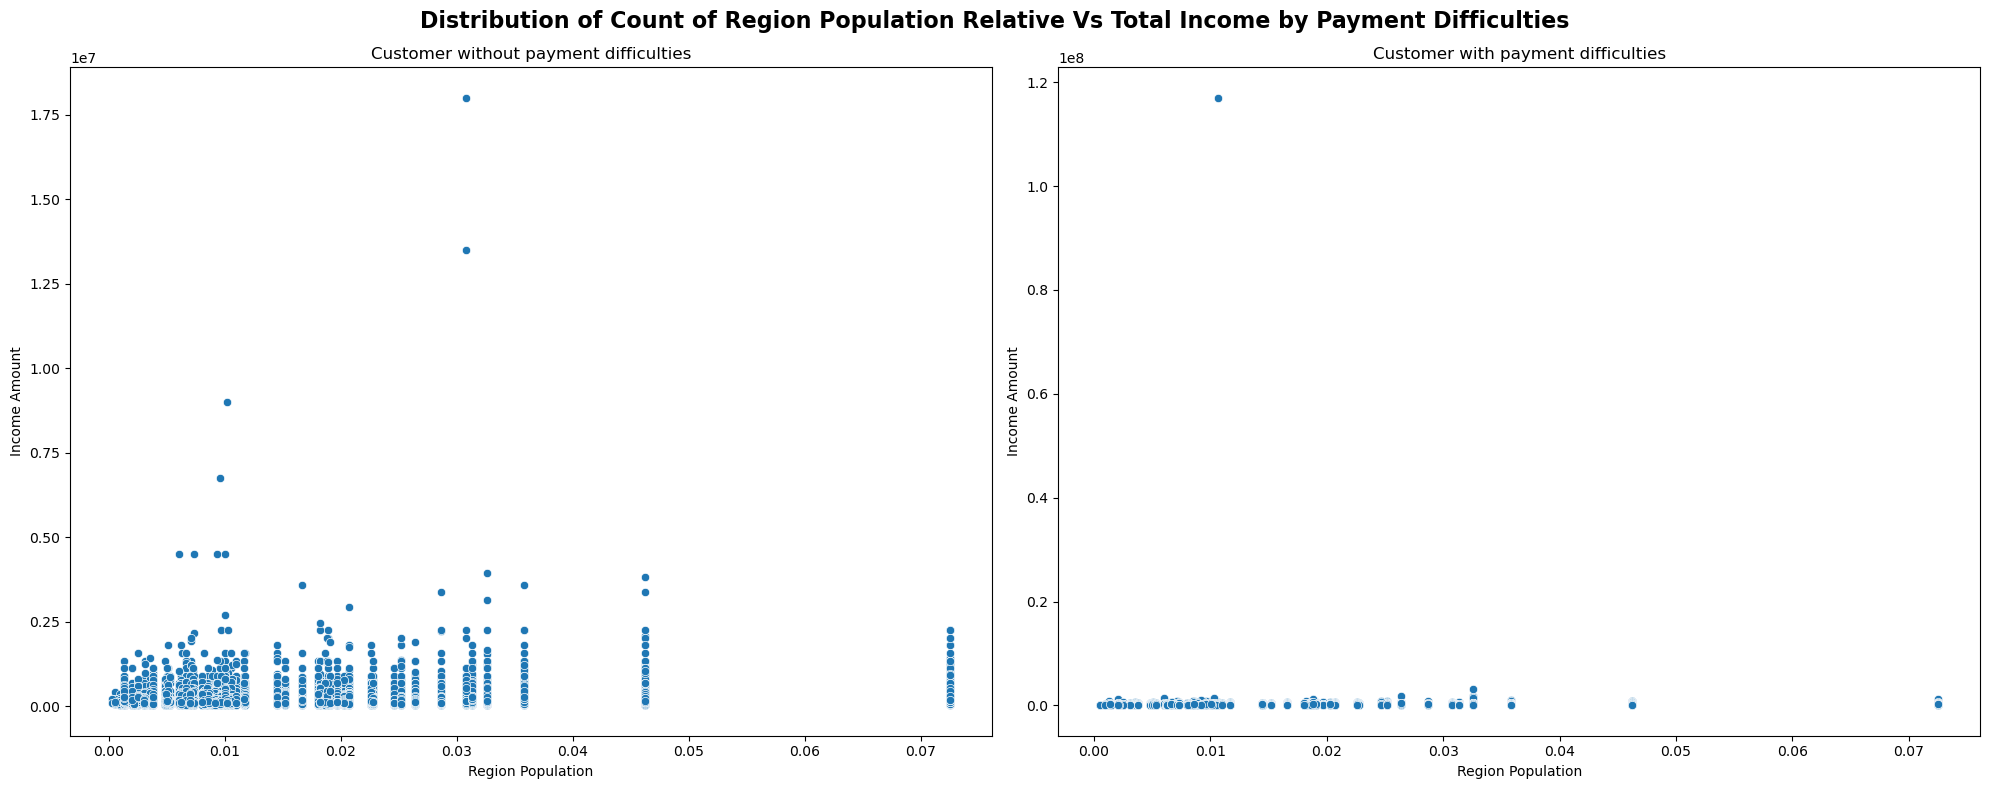

In [358]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=appli_data_target0, y='AMT_INCOME_TOTAL',x='REGION_POPULATION_RELATIVE')
plt.title('Customer without payment difficulties')
plt.ylabel('Income Amount')
plt.xlabel('Region Population')

plt.subplot(1,2,2)
sns.scatterplot(data=appli_data_target1, y='AMT_INCOME_TOTAL',x='REGION_POPULATION_RELATIVE')
plt.title('Customer with payment difficulties')
plt.ylabel('Income Amount')
plt.xlabel('Region Population')

plt.suptitle("Distribution of Count of Region Population Relative Vs Total Income by Payment Difficulties", fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Clients having low income has payment difficulties like in rural areas having less population 
 </br>
2. Clients having high income amount and population is also high; dosen't have any payment difficulties  </br>

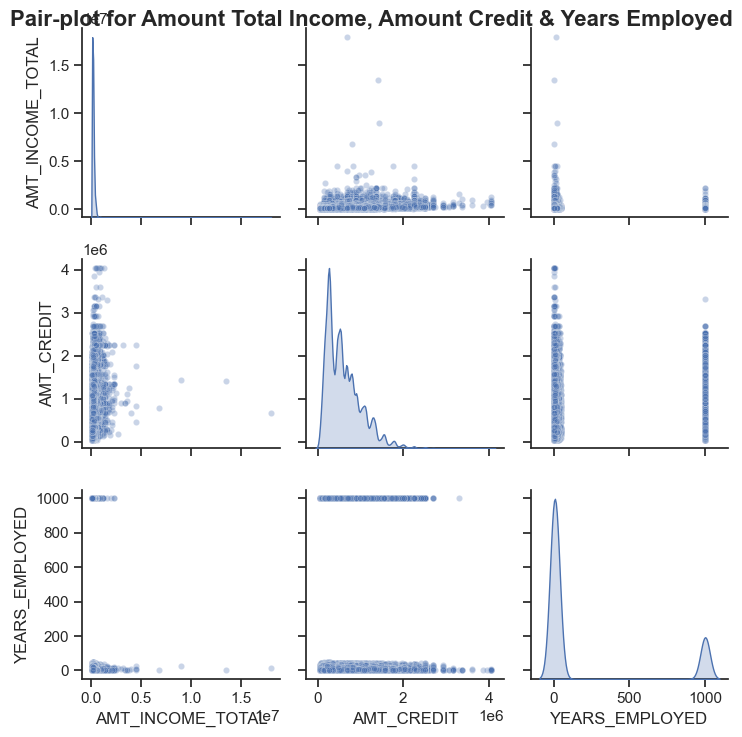

In [373]:
sns.set(style="ticks")

# Create pair plot with adjusted marker size and transparency
sns.pairplot(appli_data_target0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'YEARS_EMPLOYED']], diag_kind='kde', plot_kws={'alpha': 0.3, 's': 20})
plt.tight_layout()

plt.suptitle("Pair-plot for Amount Total Income, Amount Credit & Years Employed", fontsize=16, fontweight='bold')
# Show the plot
plt.show()

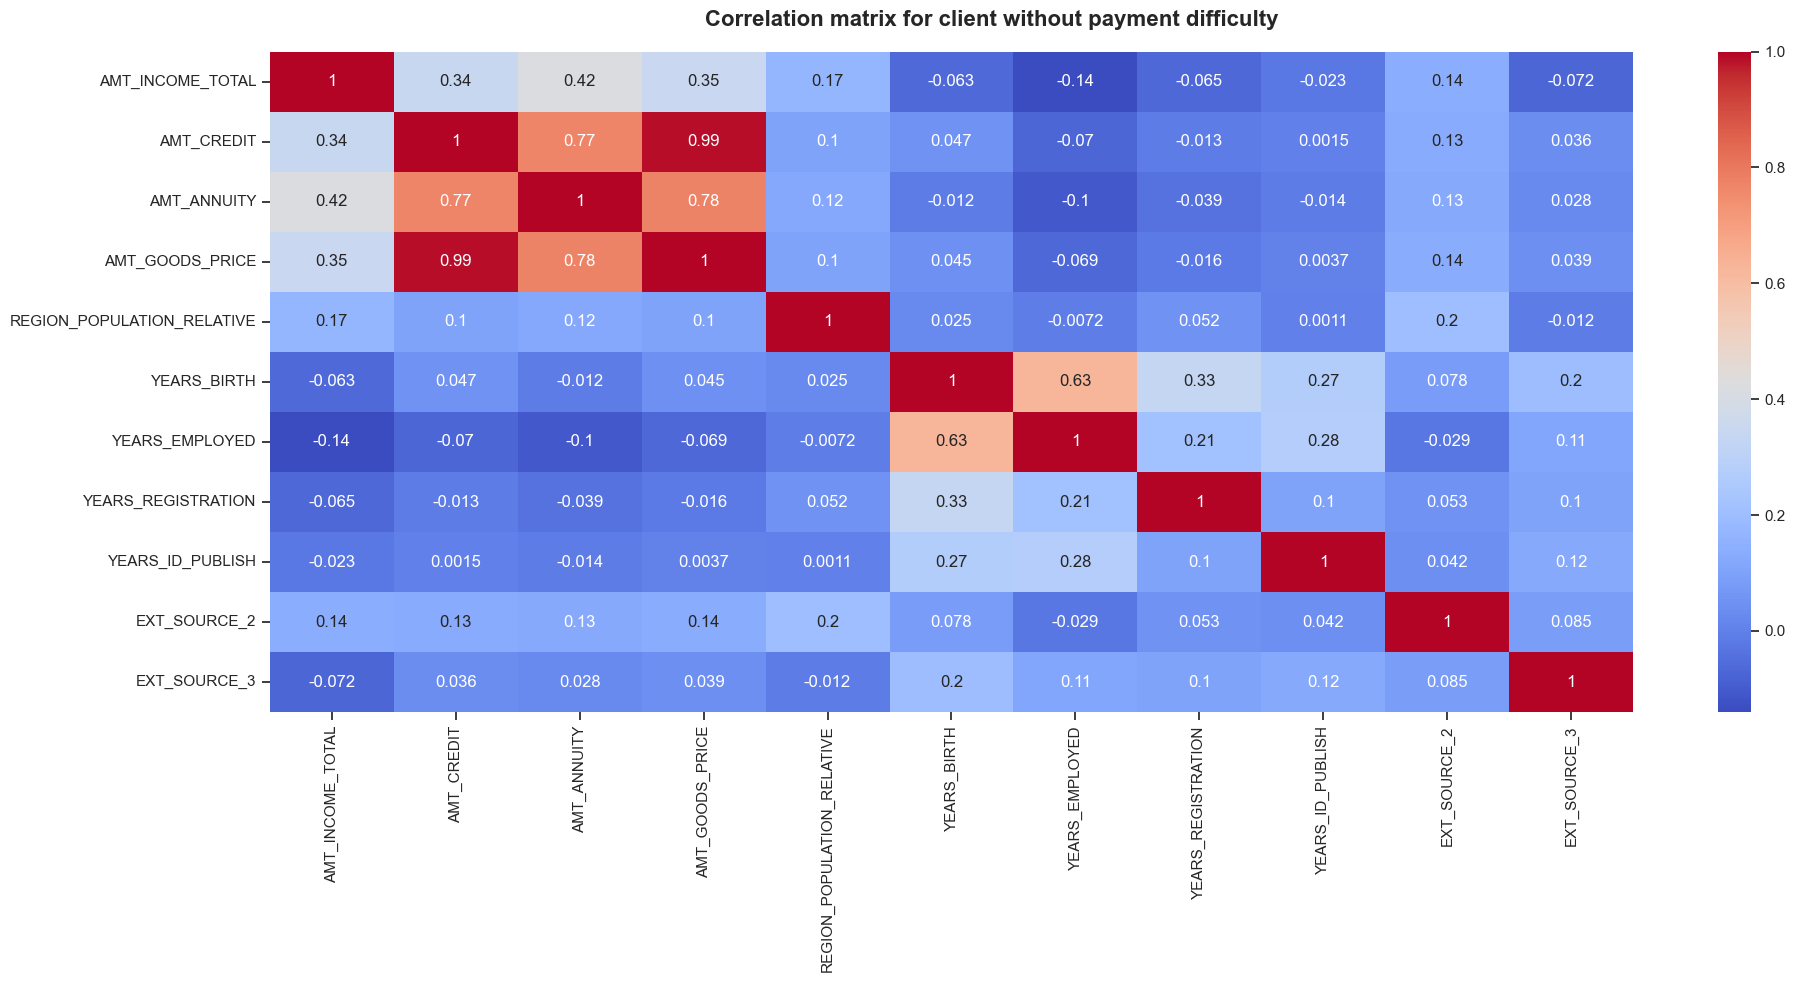

Top 10 Correlations for client without payment difficulty :
AMT_INCOME_TOTAL    AMT_INCOME_TOTAL    1.000000
AMT_CREDIT          AMT_GOODS_PRICE     0.987250
AMT_ANNUITY         AMT_GOODS_PRICE     0.776686
AMT_CREDIT          AMT_ANNUITY         0.771309
YEARS_BIRTH         YEARS_EMPLOYED      0.626114
AMT_INCOME_TOTAL    AMT_ANNUITY         0.418953
AMT_GOODS_PRICE     AMT_INCOME_TOTAL    0.349462
AMT_CREDIT          AMT_INCOME_TOTAL    0.342799
YEARS_REGISTRATION  YEARS_BIRTH         0.333150
YEARS_EMPLOYED      YEARS_ID_PUBLISH    0.276664
YEARS_BIRTH         YEARS_ID_PUBLISH    0.271315
dtype: float64


In [397]:
#we need considet only numeric data type for coorelation matrix hence creating a df whihc is having only numeric data 
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
appli_data_target0_numeric = appli_data_target0.select_dtypes(include=['float64'])

# Calculate correlation matrix
corr_matrix = appli_data_target0_numeric.corr()

# Get top 10 correlations
top_10_correlations = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(11)

# Plot heatmap for correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Add title
plt.suptitle("Correlation matrix for client without payment difficulty", fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print top 10 correlations
print("Top 10 Correlations for client without payment difficulty :")
print(top_10_correlations)

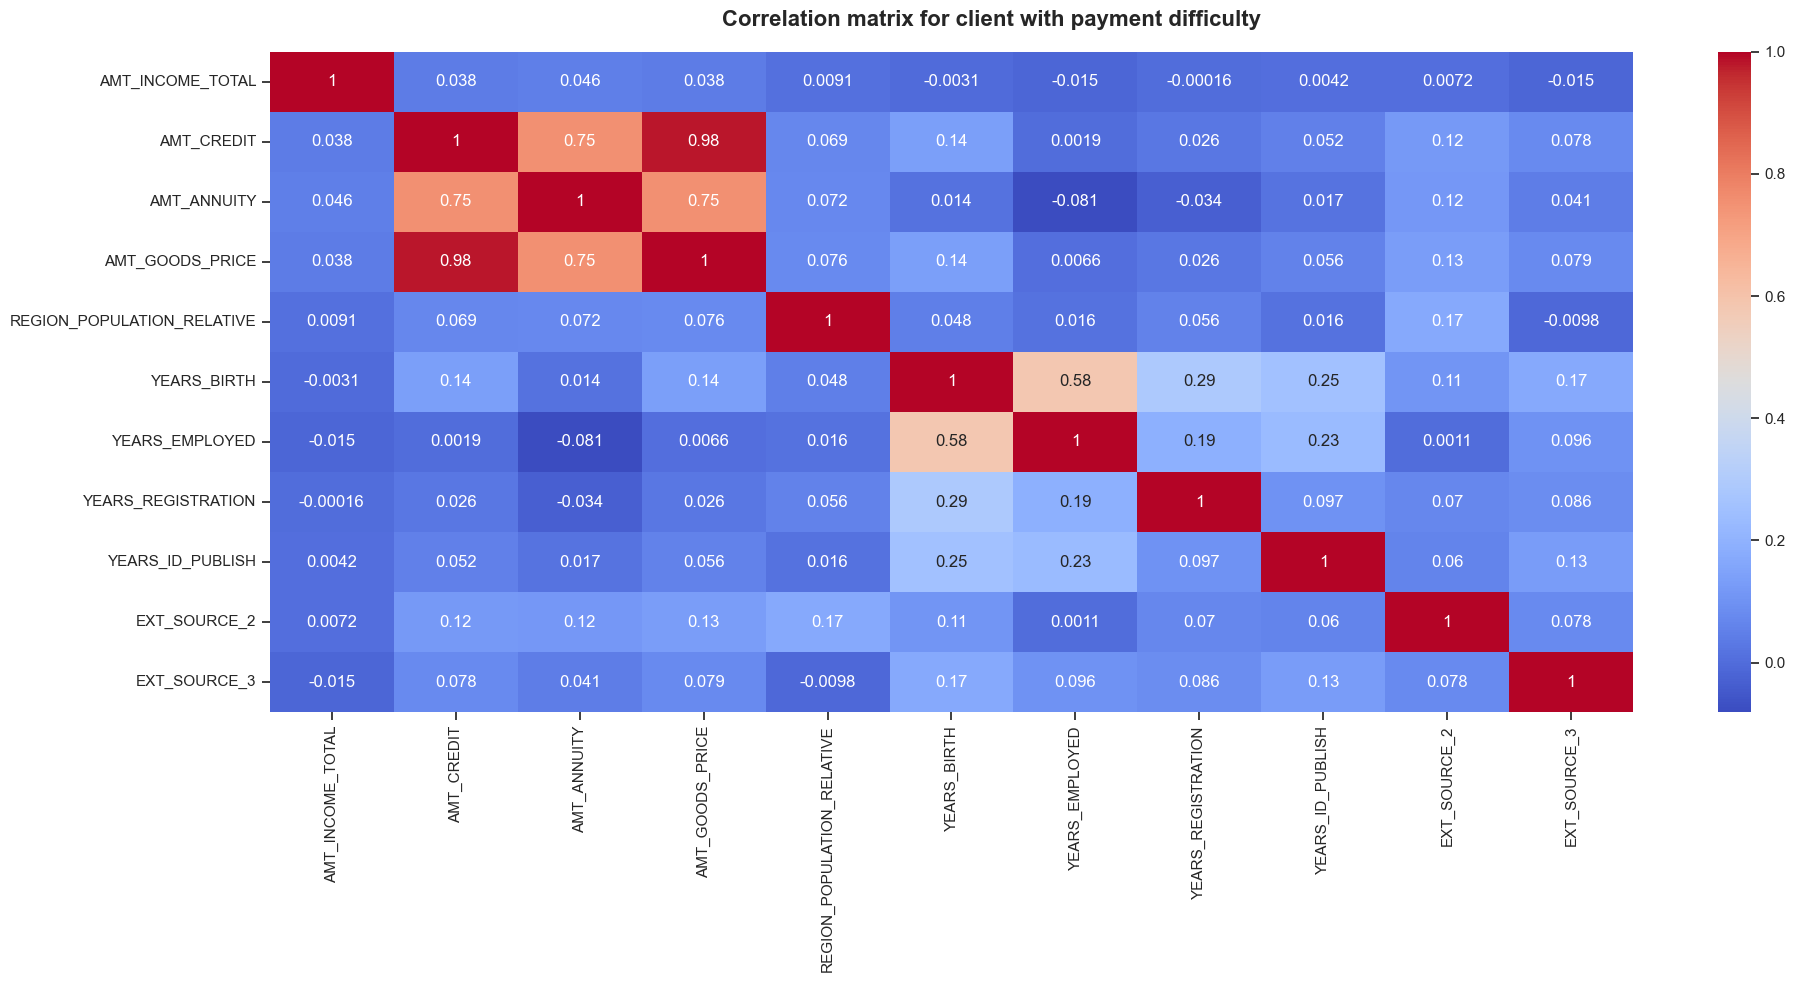

Top 10 Correlation for client with payment difficulty:
AMT_INCOME_TOTAL            AMT_INCOME_TOTAL    1.000000
AMT_CREDIT                  AMT_GOODS_PRICE     0.983103
AMT_ANNUITY                 AMT_GOODS_PRICE     0.752699
AMT_CREDIT                  AMT_ANNUITY         0.752195
YEARS_EMPLOYED              YEARS_BIRTH         0.582187
YEARS_REGISTRATION          YEARS_BIRTH         0.289111
YEARS_ID_PUBLISH            YEARS_BIRTH         0.252867
                            YEARS_EMPLOYED      0.229094
YEARS_REGISTRATION          YEARS_EMPLOYED      0.192454
EXT_SOURCE_3                YEARS_BIRTH         0.171618
REGION_POPULATION_RELATIVE  EXT_SOURCE_2        0.169751
dtype: float64


In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
appli_data_target1_numeric = appli_data_target1.select_dtypes(include=['float64'])

# Calculate correlation matrix
corr_matrix = appli_data_target1_numeric.corr()

# Get top 10 correlations
top_10_correlations = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(11)

# Plot heatmap for correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Add title
plt.suptitle("Correlation matrix for client with payment difficulty", fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print top 10 correlations
print("Top 10 Correlation for client with payment difficulty:")
print(top_10_correlations)

Numerical-Categorical bivariate analysis

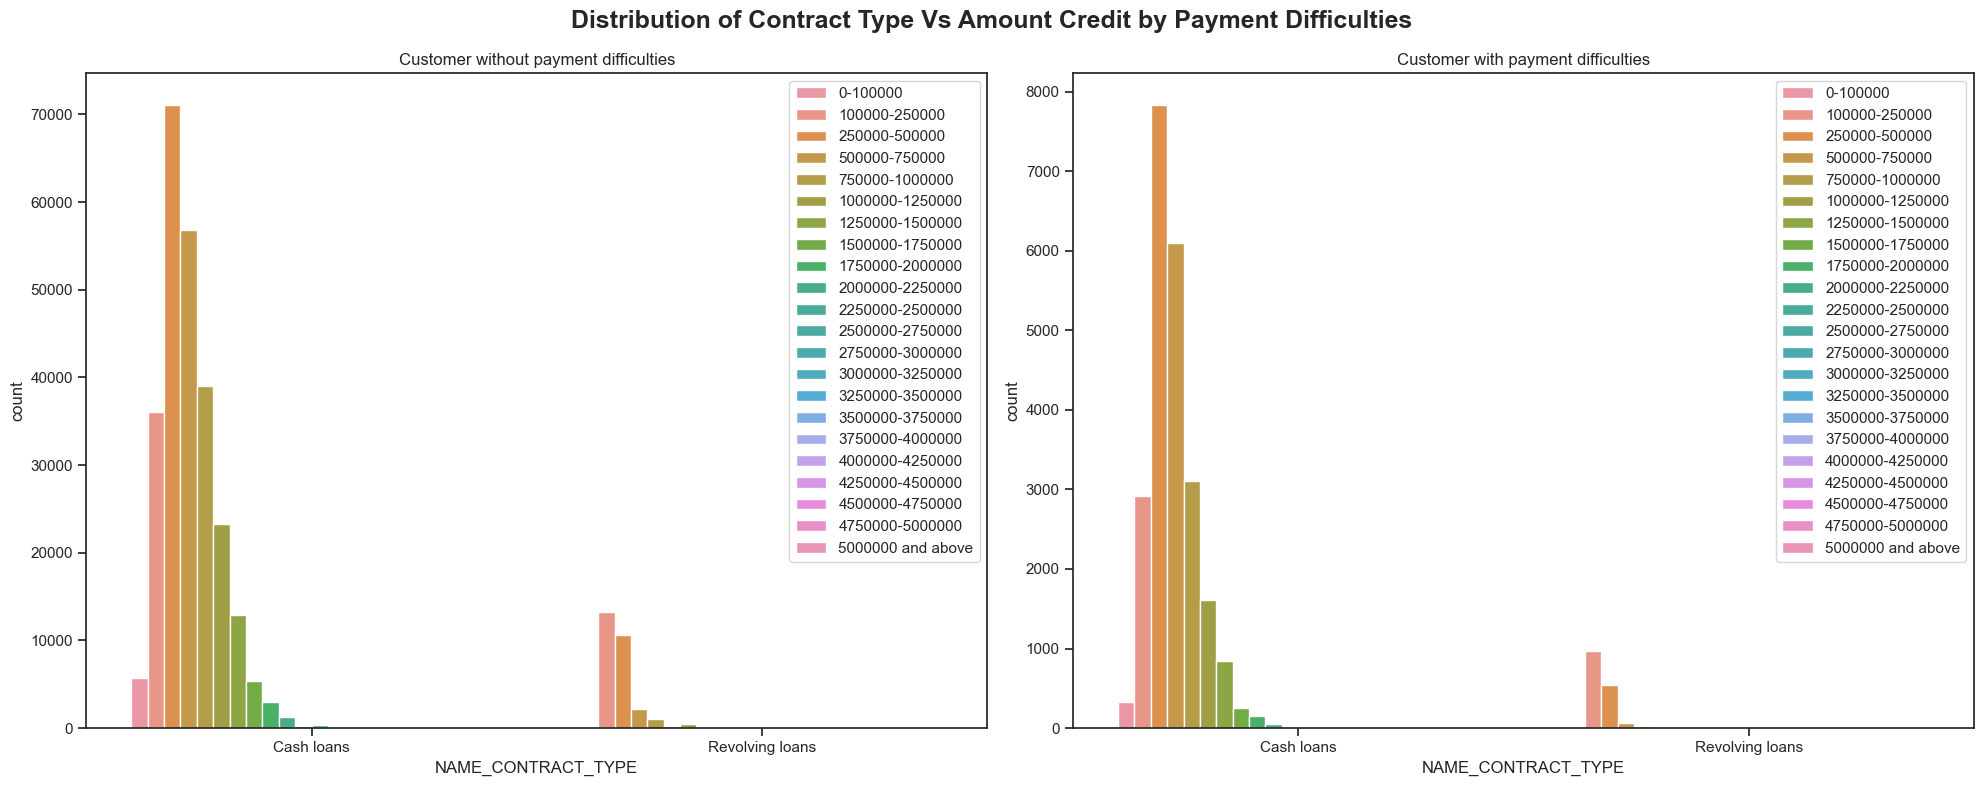

In [377]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=appli_data_target0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=appli_data_target1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')

plt.suptitle("Distribution of Contract Type Vs Amount Credit by Payment Difficulties", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Cash loans are more than revolving loans considering the quantity  </br>
2. Cashloans are more in the range of 2500000 to 1000000  </br>

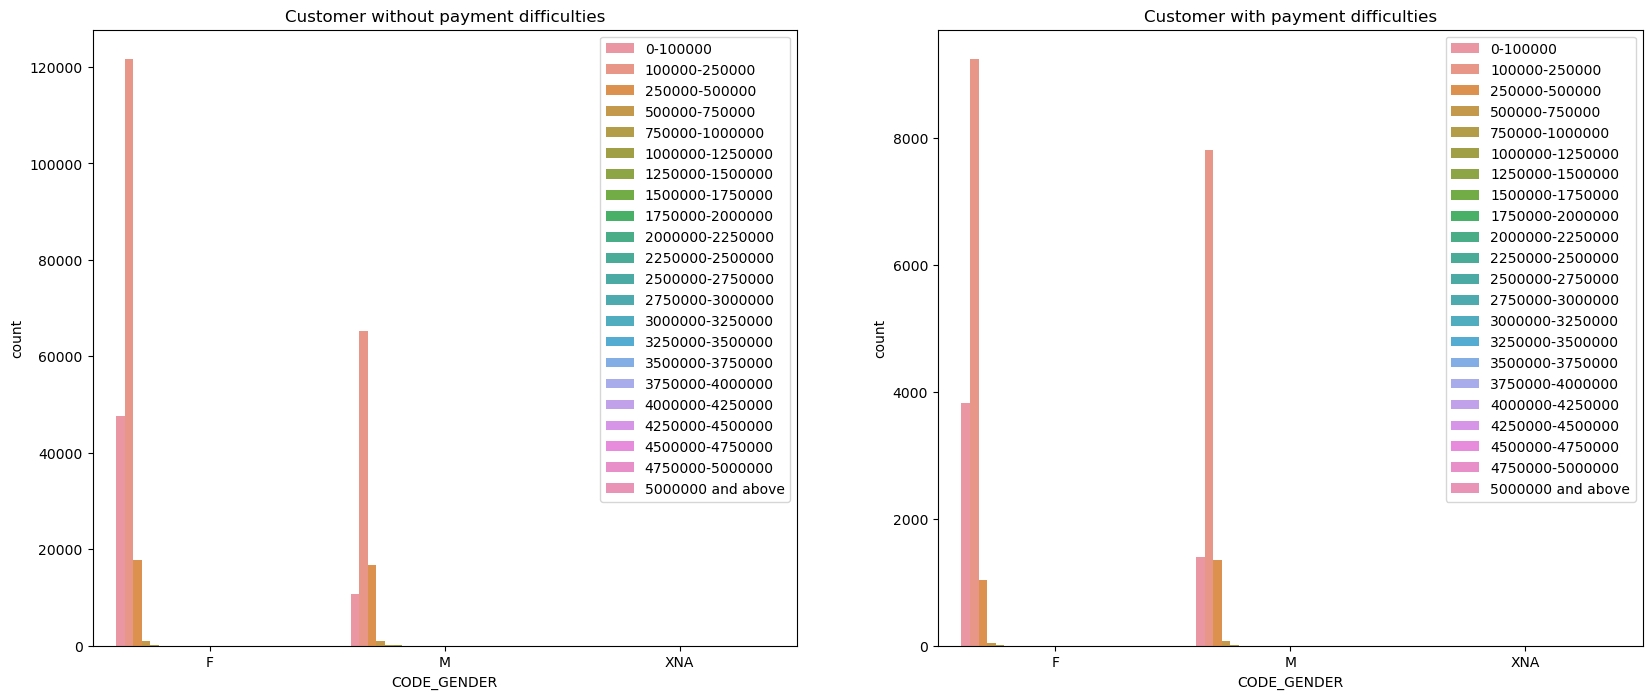

In [199]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=appli_data_target0,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=appli_data_target1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

numerical- categorical bivariate analysis

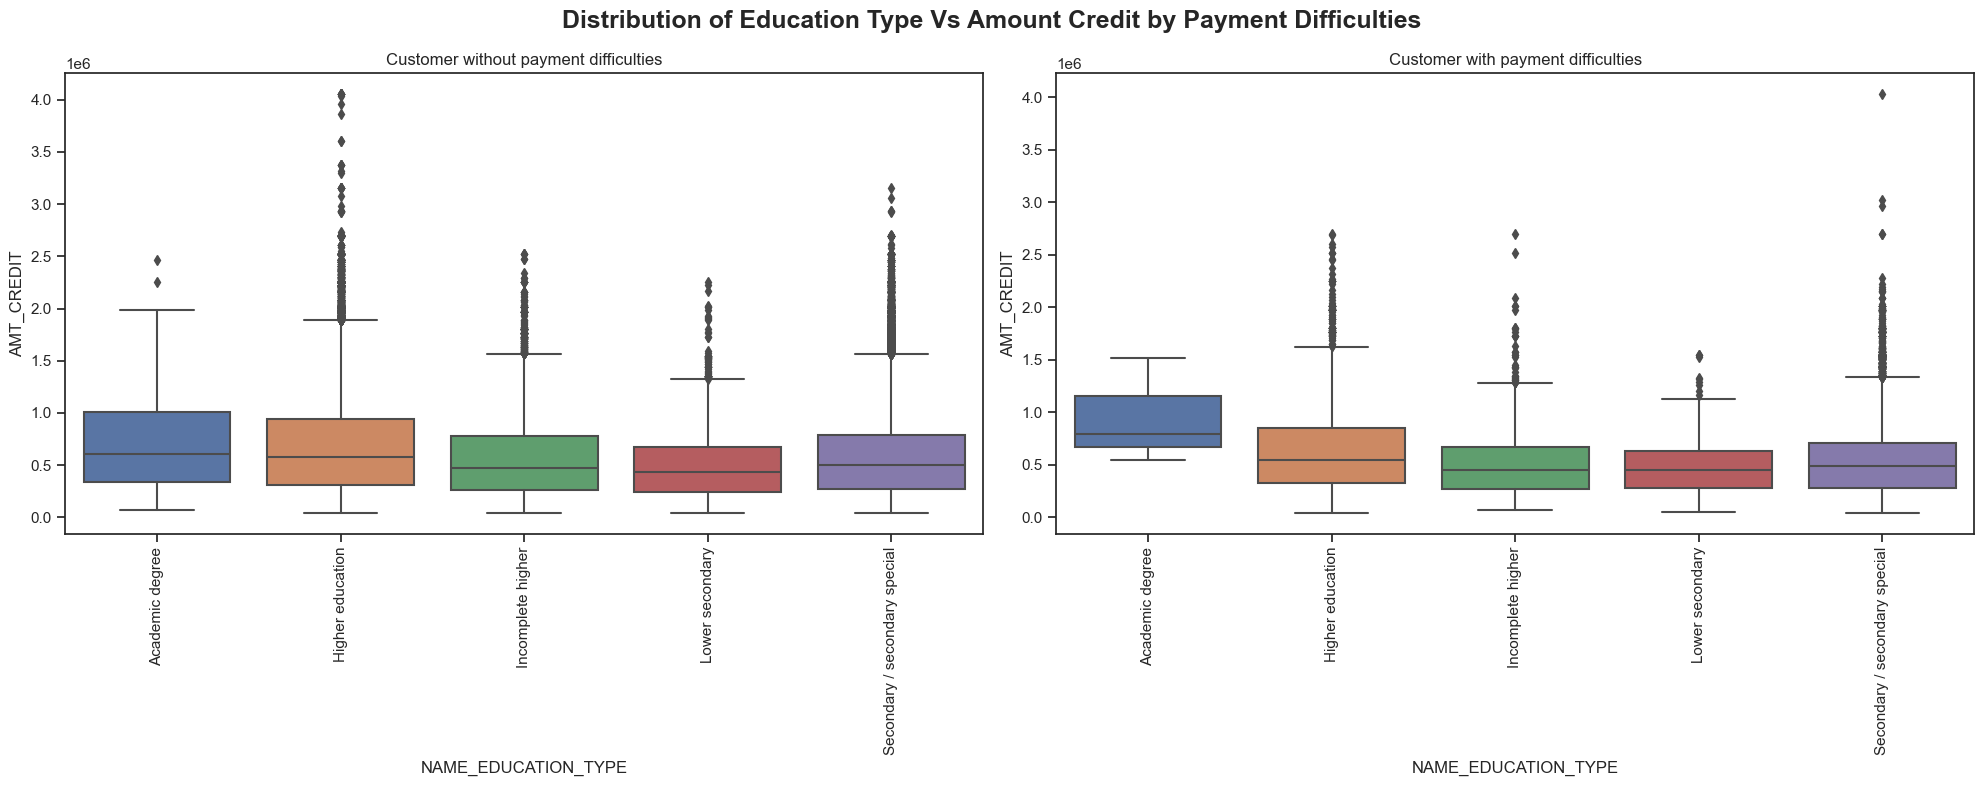

In [378]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.suptitle("Distribution of Education Type Vs Amount Credit by Payment Difficulties", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()


<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1.  Here we can see that the range of customers with payment difficulties havinf only Academic degree having high amount of credit  </br>
2. Higher education, secondary / secondary special having higher credit amount occuring in both cases  

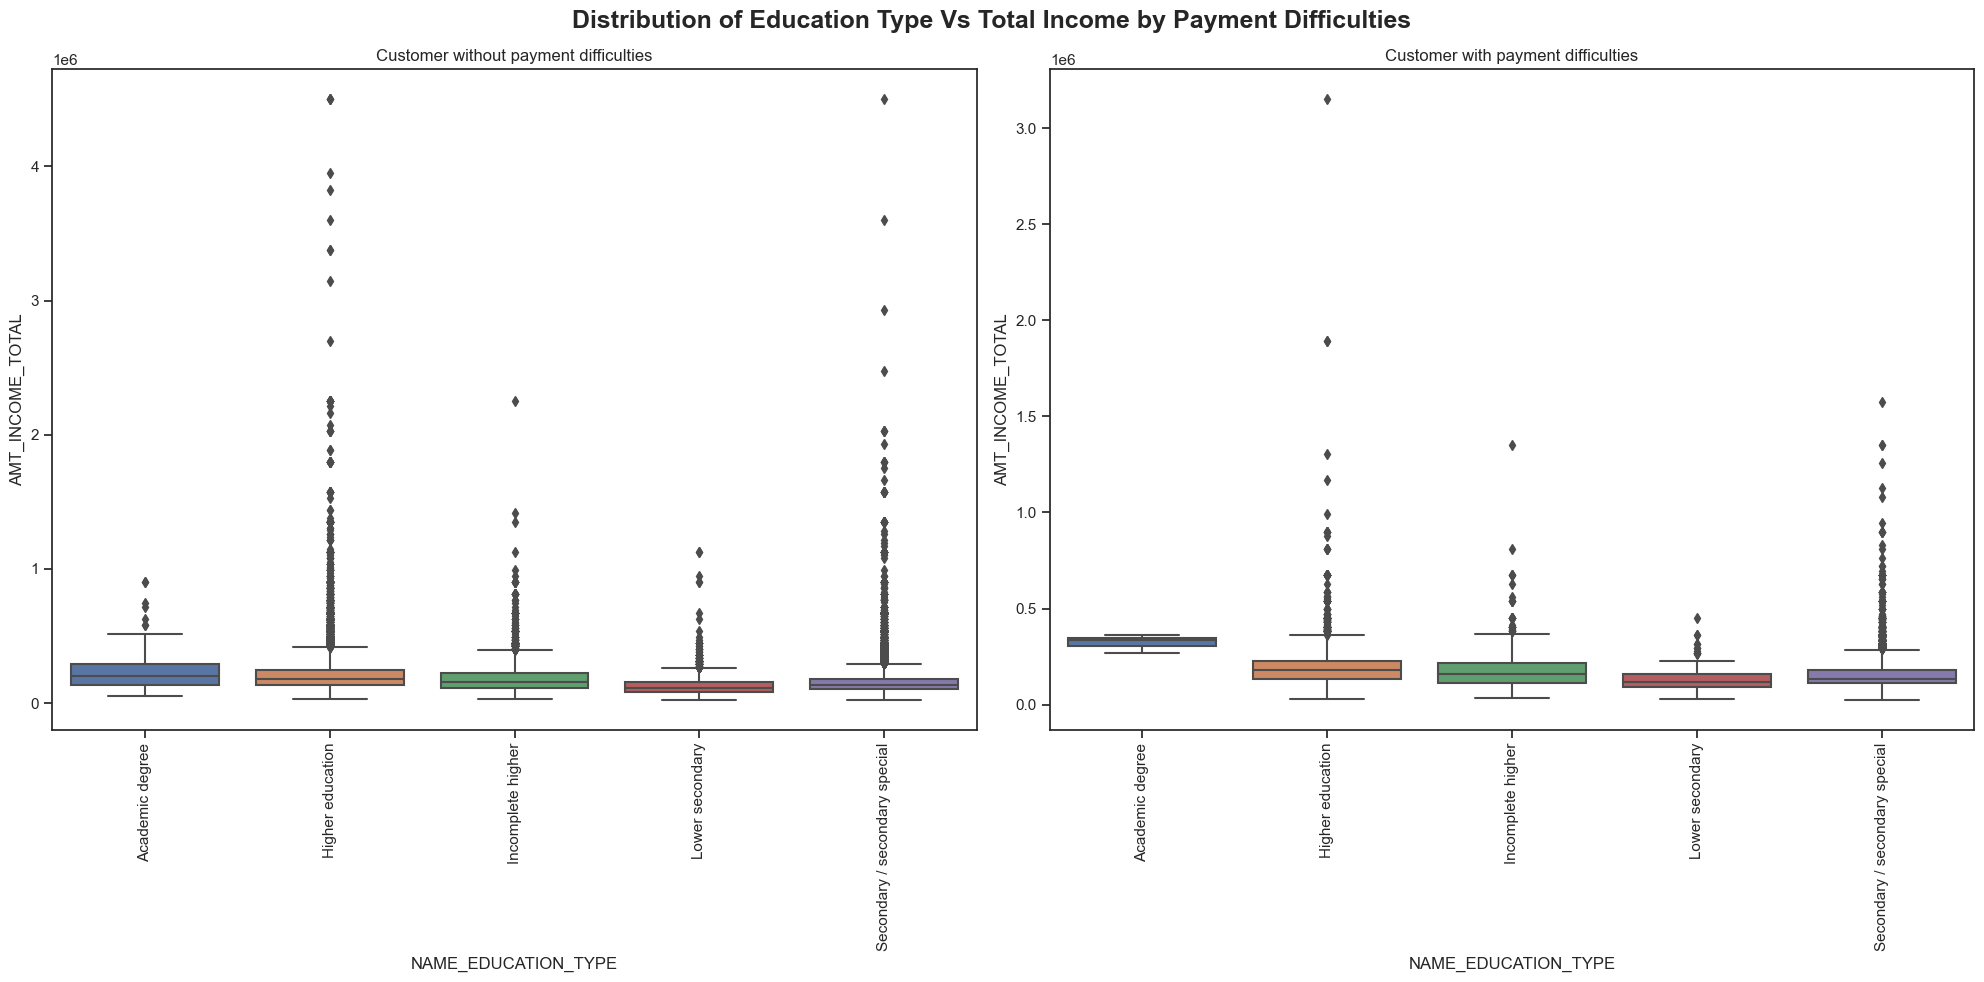

In [404]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0[appli_data_target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1[appli_data_target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.suptitle("Distribution of Education Type Vs Total Income by Payment Difficulties", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :   </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Customer without payment difficulties having higher and secondary / secondary special education because they have salaried job </br>
2. Customer having only academic degree has payment difficulty because they have less salary compared to other education type 

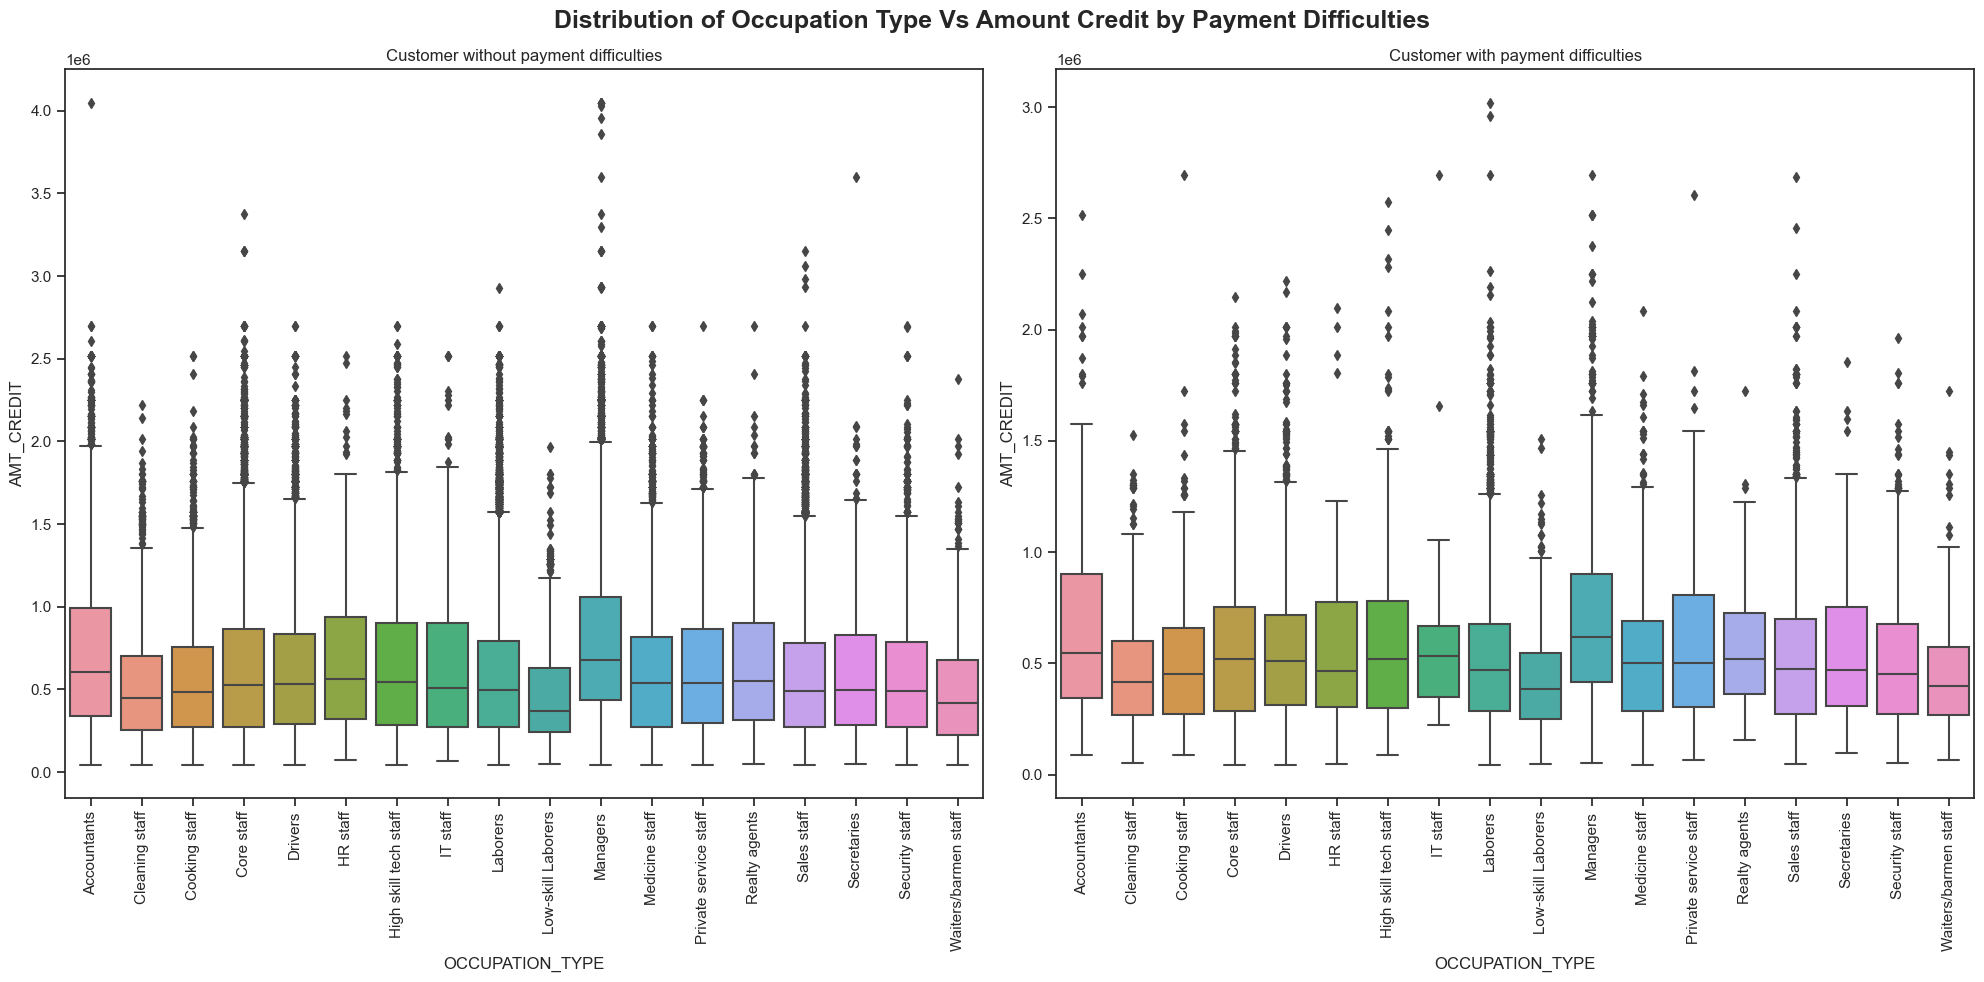

In [405]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)

plt.suptitle("Distribution of Occupation Type Vs Amount Credit by Payment Difficulties", fontsize=18, fontweight='bold')
plt.tight_layout()
    
plt.show()

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Managers and Accountants having took very high credit </br>
2. In both the cases Managers, Accountants, Cooking staff & Sales Staff having high amount of credit due to which they have payment difficulties 

# Merging two dataframes

In [407]:
previous_application_df = pd.read_csv('previous_application.csv')

In [408]:
previous_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [409]:
previous_application_df.shape

(1670214, 37)

In [410]:
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [411]:
previous_application_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [412]:
application_data.shape

(307511, 122)

In [413]:
previous_application_df.shape

(1670214, 37)

In [414]:
#merging dataframe 
# merging the application data with previous application data

all_data_df = pd.merge(left=application_data,right=previous_application_df,how='inner',on='SK_ID_CURR')

In [415]:
all_data_df.shape

(1413701, 158)

In [416]:
all_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 158 columns]

In [417]:
all_data_df['NAME_CONTRACT_STATUS'].value_counts()*100/len(all_data_df)

NAME_CONTRACT_STATUS
Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: proportion, dtype: float64

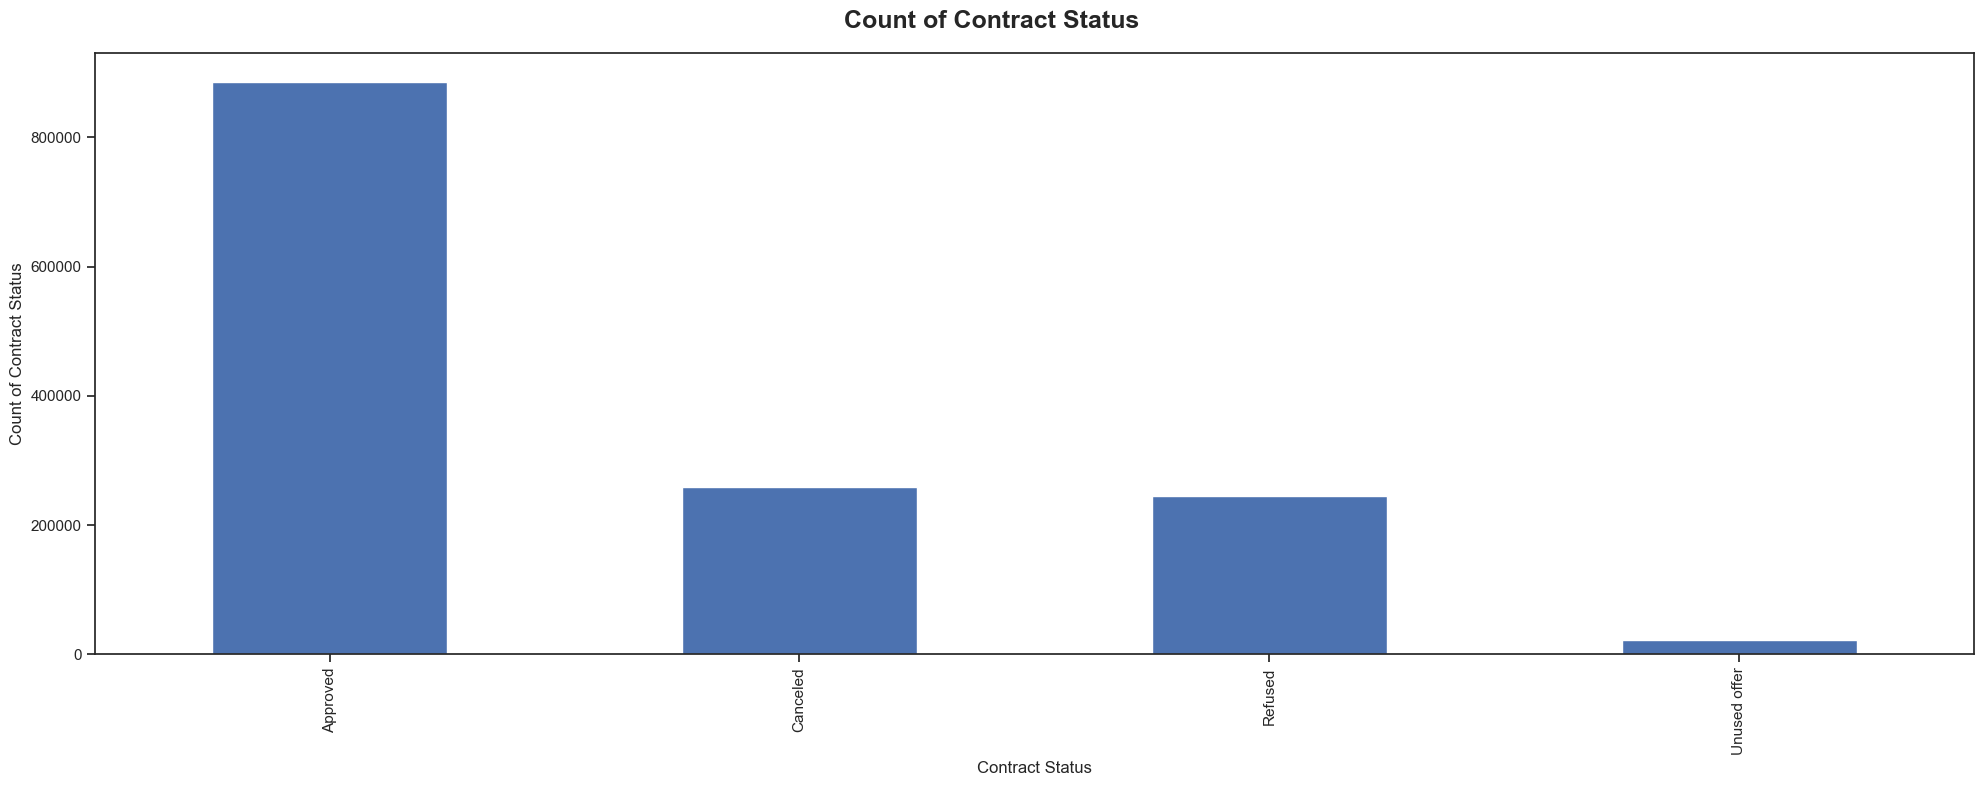

In [440]:
# Plot the countplot without seaborn
plt.figure(figsize=(20,8)) 

all_data_df['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")

plt.suptitle("Count of Contract Status", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Count of Approved loans are too high </br>
2. Count of cancelled and refused loan is almost same. 

In [427]:
#diving the new dataframe into 4parts based on contract status, i.e: Approved, Refused, Cancelled, Unused Offer

approved_df = all_data_df[all_data_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = all_data_df[all_data_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=all_data_df[all_data_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=all_data_df[all_data_df['NAME_CONTRACT_STATUS']=='Unused offer']


<Figure size 2000x1200 with 0 Axes>

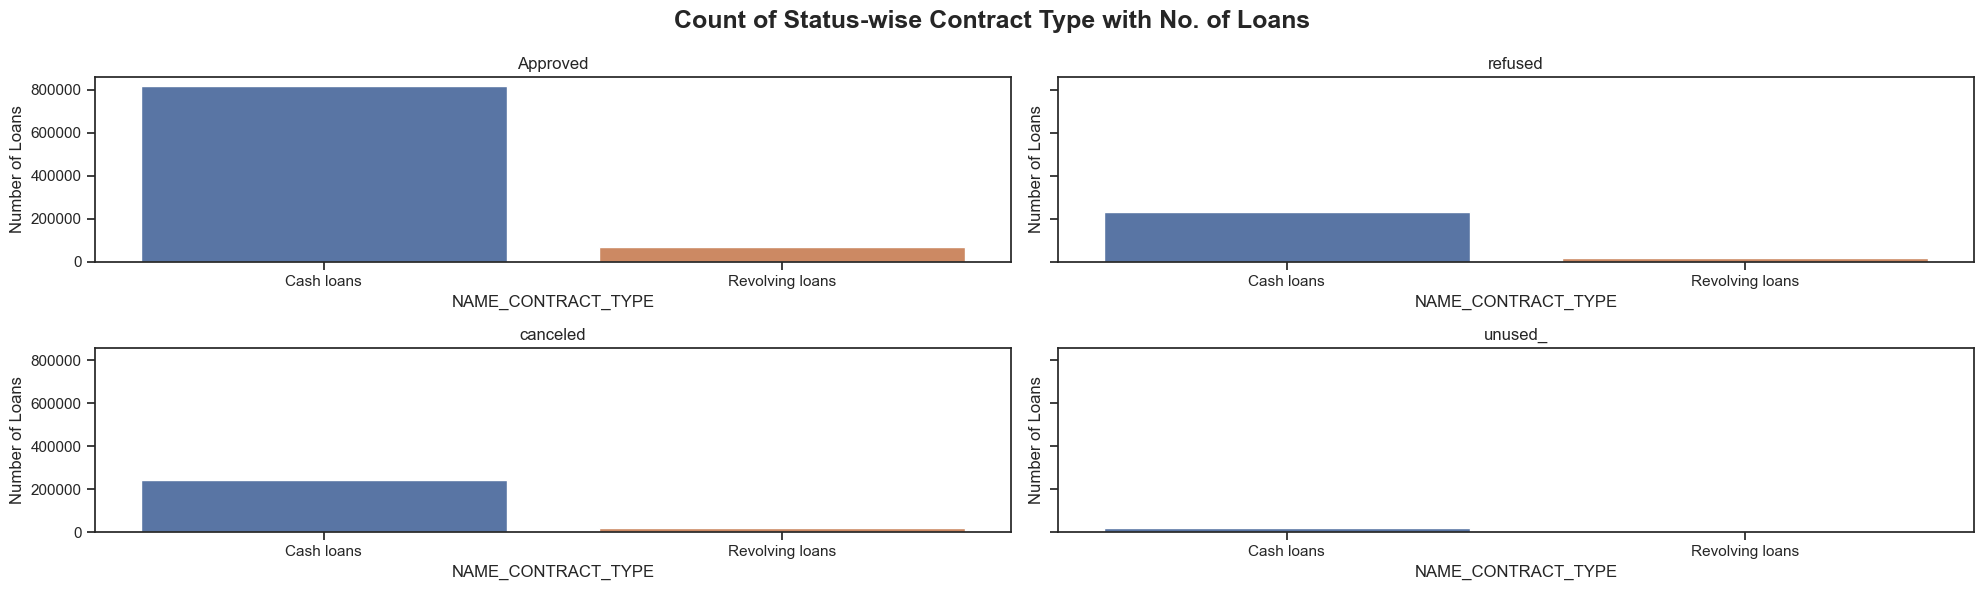

In [443]:
#Analysis on variable 'NAME_CONTRACT_TYPE_x' 
plt.figure(figsize=(20,12)) 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_CONTRACT_TYPE_x')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CONTRACT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_CONTRACT_TYPE_x')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_CONTRACT_TYPE_x')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CONTRACT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_CONTRACT_TYPE_x')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CONTRACT_TYPE')
ax4.set_ylabel('Number of Loans')

plt.suptitle("Count of Status-wise Contract Type with No. of Loans", fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()


<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1.  Cash Loan applicants are high </br>
2. Approved cash loans are double in count than refused and cancelled loans  </br>
3. Revolving loans having high acceptance rate 

<Figure size 1000x800 with 0 Axes>

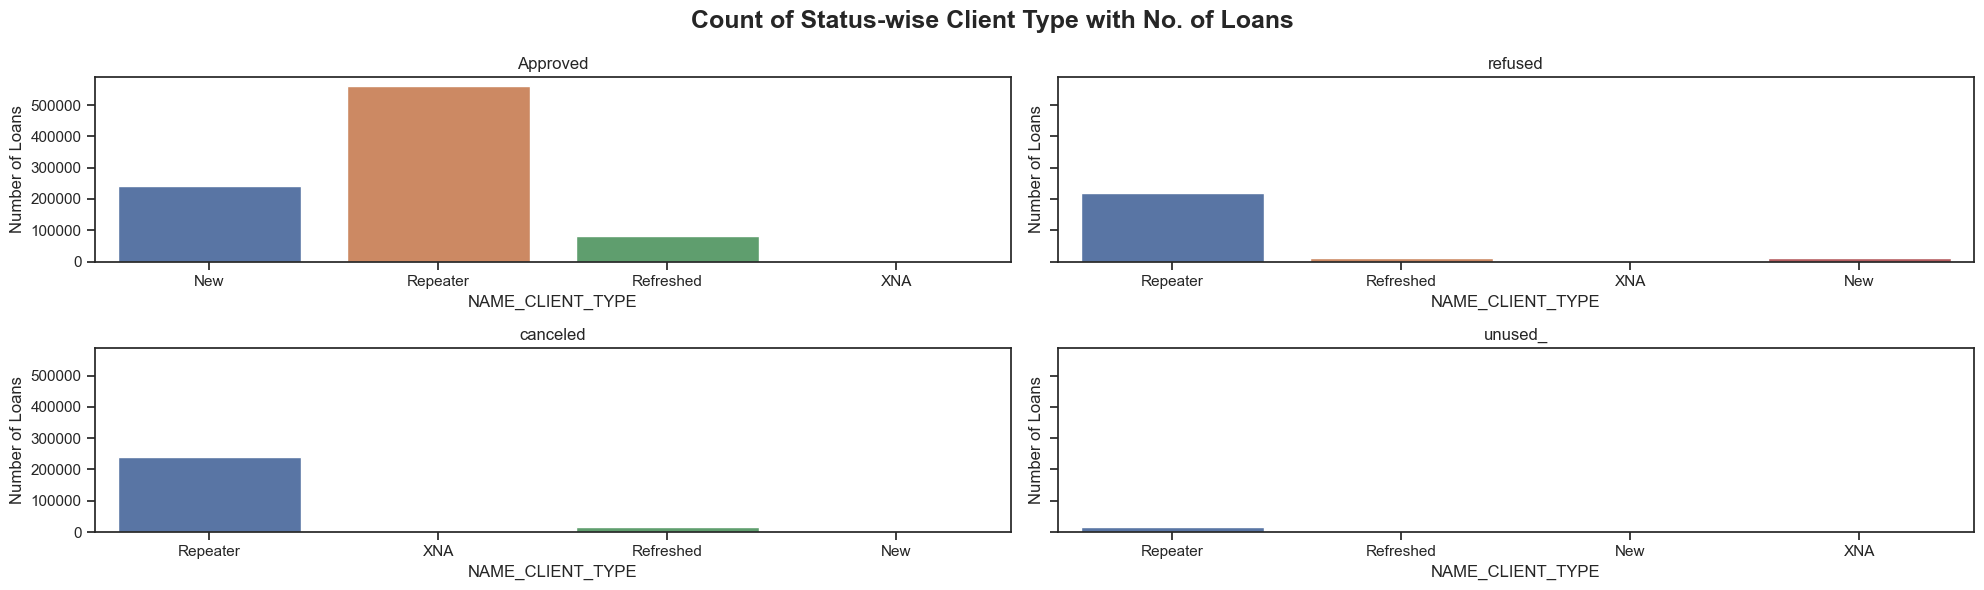

In [450]:
##Analysis on variable 'NAME_CONTRACT_TYPE_x' 
plt.figure(figsize=(10,8)) 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_CLIENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_CLIENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_CLIENT_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CLIENT_TYPE')
ax4.set_ylabel('Number of Loans')

plt.suptitle("Count of Status-wise Client Type with No. of Loans", fontsize=18, fontweight='bold')
plt.tight_layout()


plt.show()

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Here we can see that the Repeater is getting more Refused. </br>
2. Also we can see that the it also getting more apporved and even that it is getting more canceled and more usused. </br>


<Figure size 1000x800 with 0 Axes>

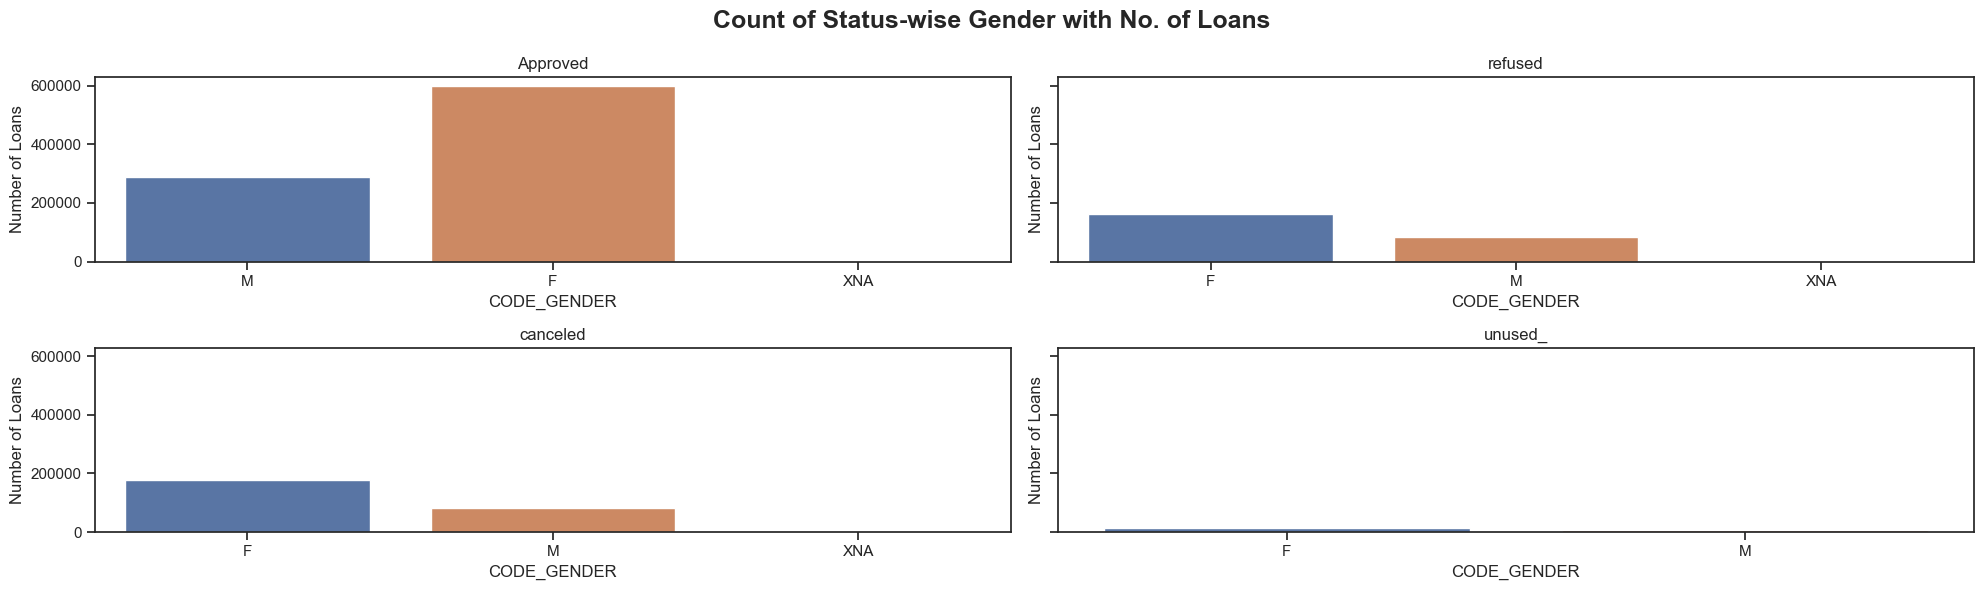

In [451]:
##Analysis on variable 'CODE_GENDER' 
plt.figure(figsize=(10,8)) 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='CODE_GENDER')
ax1.set_title('Approved')
ax1.set_xlabel('CODE_GENDER')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='CODE_GENDER')
ax2.set_title('refused')
ax2.set_xlabel('CODE_GENDER')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='CODE_GENDER')
ax3.set_title('canceled')
ax3.set_xlabel('CODE_GENDER')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='CODE_GENDER')
ax4.set_title('unused_')
ax4.set_xlabel('CODE_GENDER')
ax4.set_ylabel('Number of Loans')

plt.suptitle("Count of Status-wise Gender with No. of Loans", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Female applicants are more hence approval rate is high and refusal and cancellation rate is also higher than males. </br>
2. Males having double the approval rate than cancellation and refusal </br>

In [461]:
#as we can see that to visualize 4 plots we wrote same code multiple times. so to avoid redundancy, and to save our time,
#we will put the above code in a function and generalize it for our following plots, 
#so that its easy to visualize and saves time.

def diff_plots(variable_name):
    plt.figure(figsize=(10,8)) 

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(20,6), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_df,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()

<Figure size 1000x800 with 0 Axes>

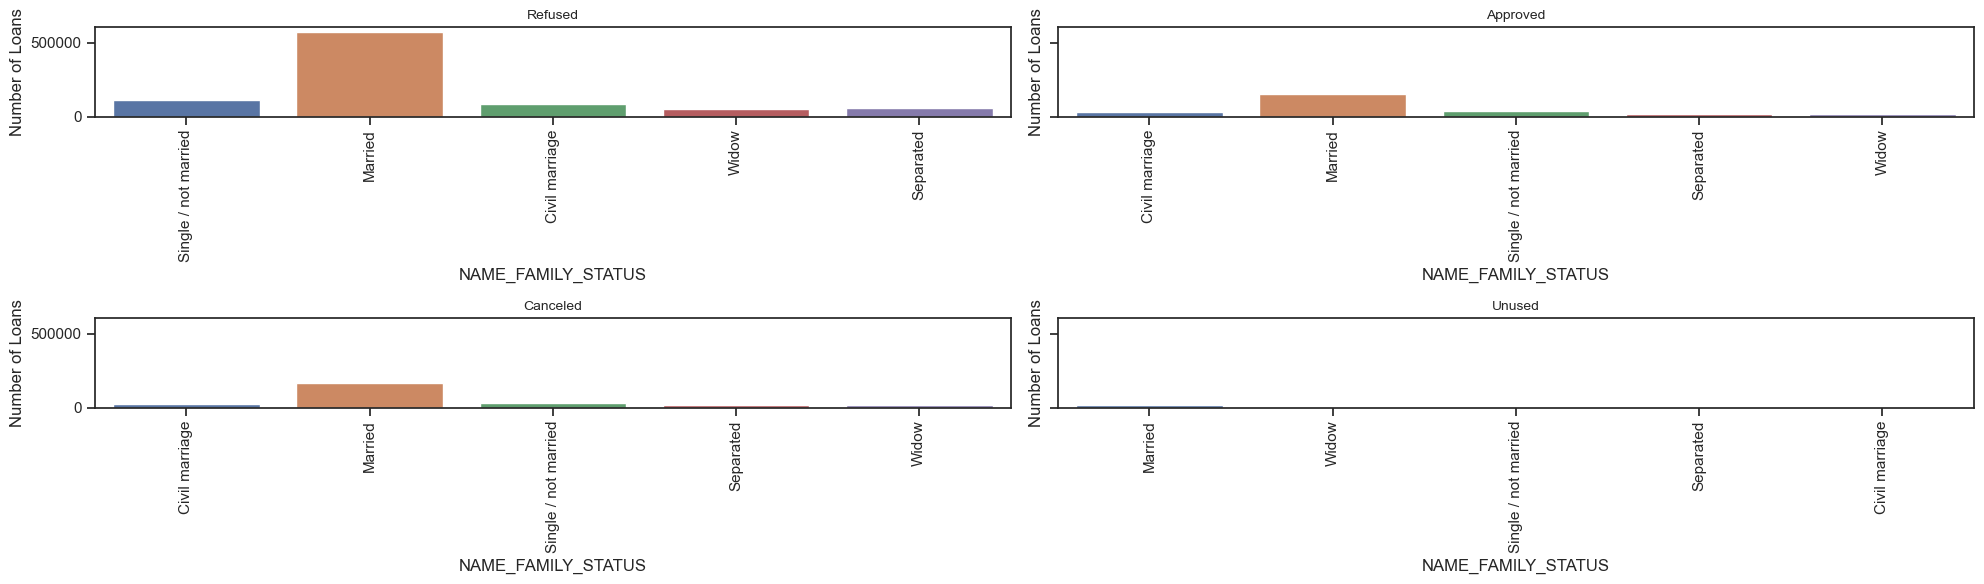

In [460]:
diff_plots('NAME_FAMILY_STATUS')

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Married applicants are more than other family status </br>
2. Hence Married applicants getting refused and approved </br>

<Figure size 1000x800 with 0 Axes>

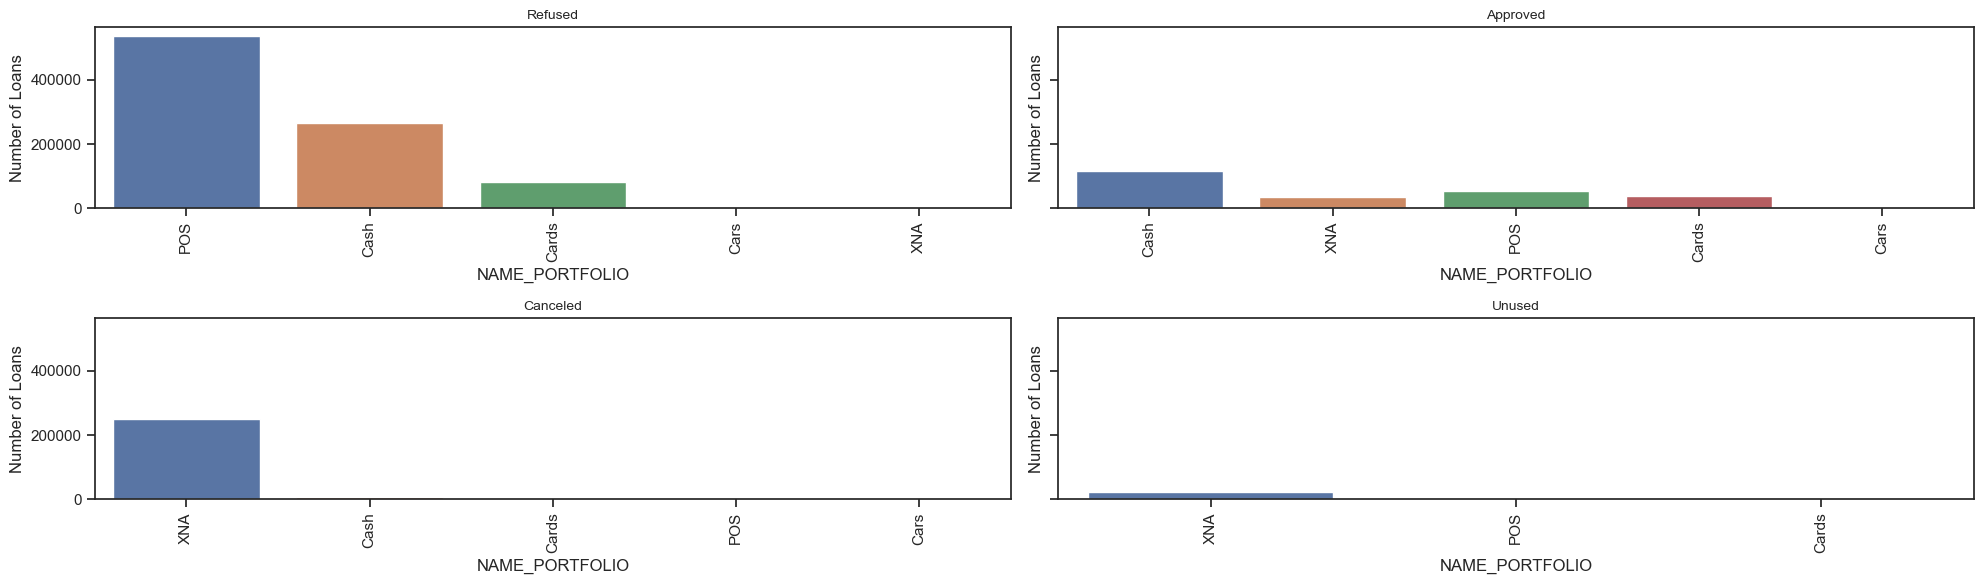

In [462]:
diff_plots('NAME_PORTFOLIO')

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Cash portfolio type having highest approval rate </br>
2. POS portfolio types are more refused </br>

<Figure size 1000x800 with 0 Axes>

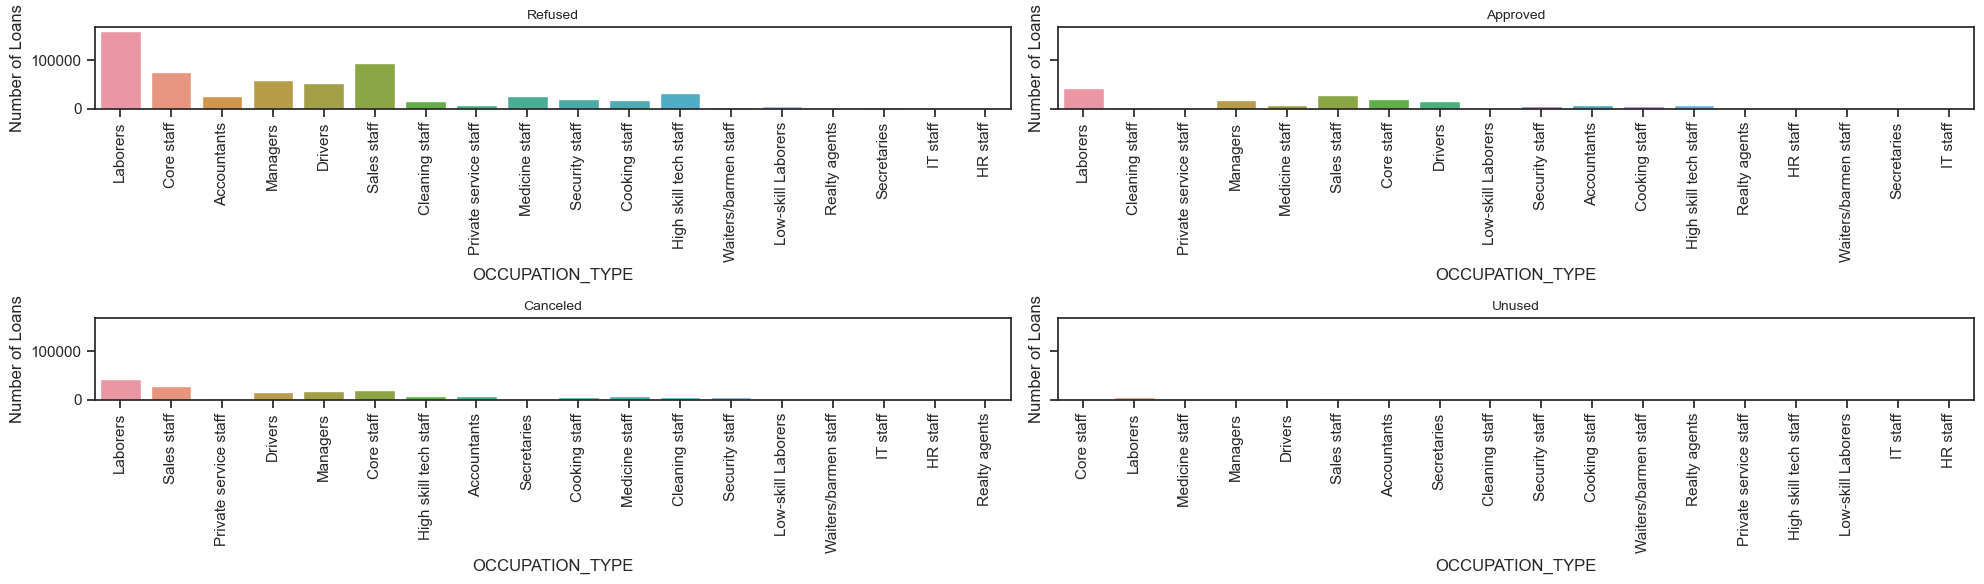

In [465]:
diff_plots('OCCUPATION_TYPE')

<span style="color: brown;"> Comments / Observations :  </span><br>
<span style="color: darkgreen;">  </span>
<span style="color: darkgreen;"> 1. Laborers having more refusal rate but they are also highest applicants </br>